# <h1><center>EDA (Data Scientist Job Change Prediction)<center><h1>

In [27]:
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import VarianceThreshold

In [3]:
import pandas as pd
df=pd.read_csv('HR_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Target Variable

In [170]:
df[['target']]

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


In [171]:
df['target'].describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

In [172]:
df['target'].shape

(19158,)

# Imbalanced Target Variable

In [173]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [174]:
df.target.value_counts()/len(df)*100

0.0    75.065247
1.0    24.934753
Name: target, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

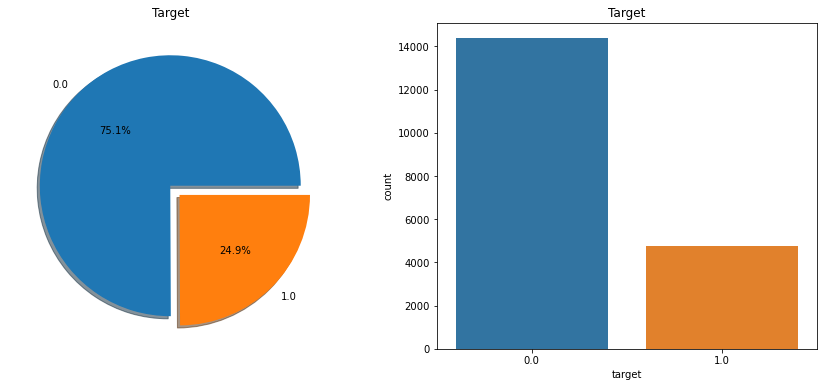

In [7]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot(x=df['target'],ax=ax[1])
ax[1].set_title('Target');

In [96]:
cor_target=df.corrwith(df['target'])
cor_target

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
dtype: float64

In [97]:
cor_target.sort_values(axis=0,ascending=False)

target                    1.000000
enrollee_id               0.049475
training_hours           -0.021577
city_development_index   -0.341665
dtype: float64

# Categorical Variables

In [98]:
# A quick glance over Categorical Variables

df.describe(include='O').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [99]:
df.select_dtypes(include=['object', 'category']).columns.tolist()

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [80]:
df_cat=df.select_dtypes(include=['object','category'])
df_cat.count()

city                   19158
gender                 14650
relevent_experience    19158
enrolled_university    18772
education_level        18698
major_discipline       16345
experience             19093
company_size           13220
company_type           13018
last_new_job           18735
dtype: int64

In [101]:
df.dtypes.value_counts()

object     10
int64       2
float64     2
dtype: int64

### Frequency of Unique Values in each Categorival Variable

In [103]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [104]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [105]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [106]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [107]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [108]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [109]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [110]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [111]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [10]:
df_cat

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [114]:
# Frequency of unique values in each categorival variable in percentage form
(df['gender'].value_counts()/len(df)*100).round(2)

Male      69.01
Female     6.46
Other      1.00
Name: gender, dtype: float64

In [115]:
(df['relevent_experience'].value_counts()/len(df)*100).round(2)

Has relevent experience    71.99
No relevent experience     28.01
Name: relevent_experience, dtype: float64

In [116]:
(df['enrolled_university'].value_counts()/len(df)*100).round(2)

no_enrollment       72.12
Full time course    19.61
Part time course     6.25
Name: enrolled_university, dtype: float64

In [117]:
(df['education_level'].value_counts()/len(df)*100).round(2)

Graduate          60.54
Masters           22.76
High School       10.53
Phd                2.16
Primary School     1.61
Name: education_level, dtype: float64

In [118]:
(df['major_discipline'].value_counts()/len(df)*100).round(2)

STEM               75.64
Humanities          3.49
Other               1.99
Business Degree     1.71
Arts                1.32
No Major            1.16
Name: major_discipline, dtype: float64

In [119]:
(df['experience'].value_counts()/len(df)*100).round(2)

>20    17.15
5       7.46
4       7.32
3       7.07
6       6.35
2       5.88
7       5.37
10      5.14
9       5.12
8       4.19
15      3.58
11      3.47
14      3.06
1       2.87
<1      2.72
16      2.65
12      2.58
13      2.08
17      1.79
19      1.59
18      1.46
20      0.77
Name: experience, dtype: float64

In [120]:
(df['company_size'].value_counts()/len(df)*100).round(2)

50-99        16.09
100-500      13.42
10000+       10.54
10/49         7.68
1000-4999     6.93
<10           6.83
500-999       4.58
5000-9999     2.94
Name: company_size, dtype: float64

In [121]:
(df['company_type'].value_counts()/len(df)*100).round(2)

Pvt Ltd                51.24
Funded Startup          5.22
Public Sector           4.98
Early Stage Startup     3.15
NGO                     2.72
Other                   0.63
Name: company_type, dtype: float64

In [122]:
(df['last_new_job'].value_counts()/len(df)*100).round(2)

1        41.97
>4       17.17
2        15.14
never    12.80
4         5.37
3         5.35
Name: last_new_job, dtype: float64

### Mode of Categorical Values

In [123]:
cat_col=['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']
df[cat_col].mode()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1


### Visualization of Categorical Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

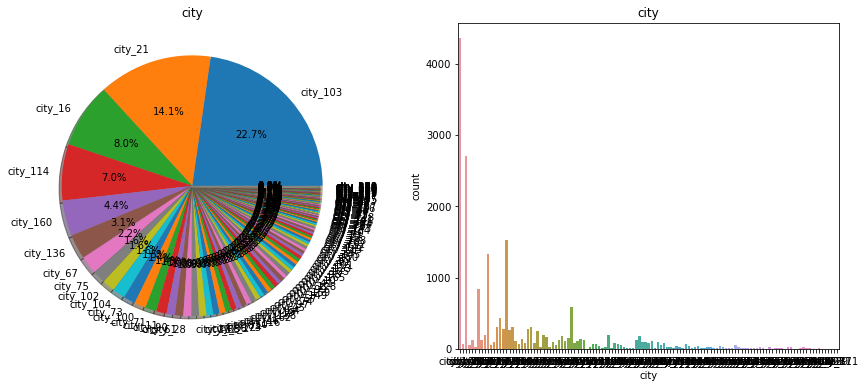

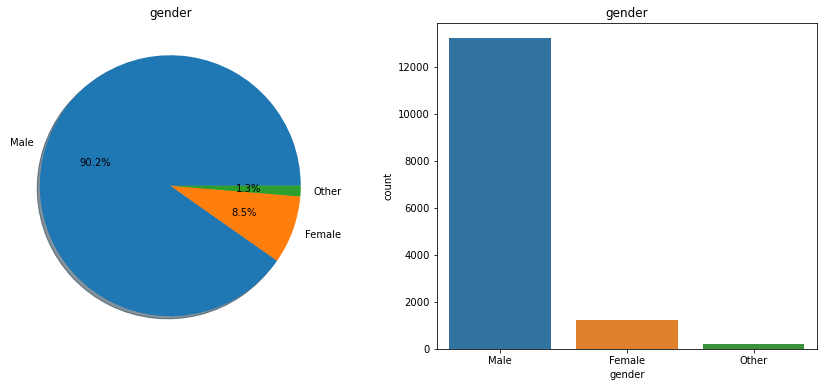

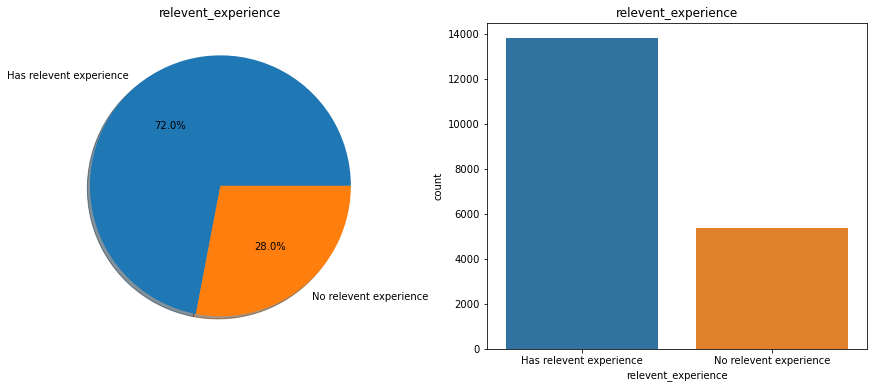

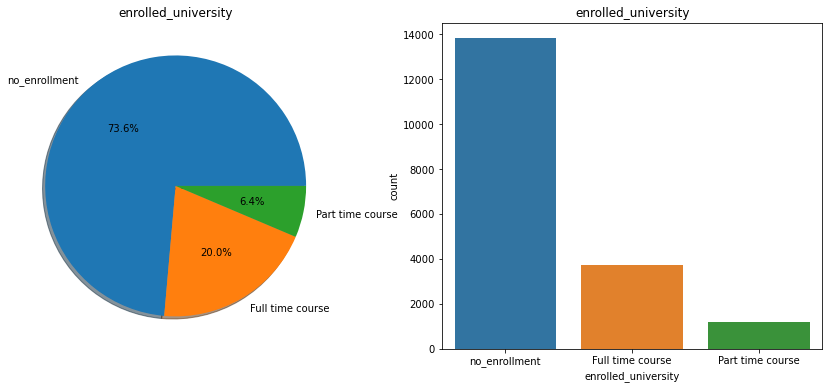

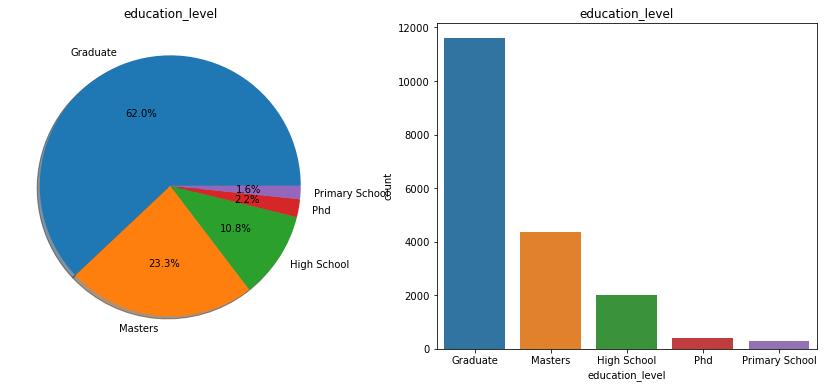

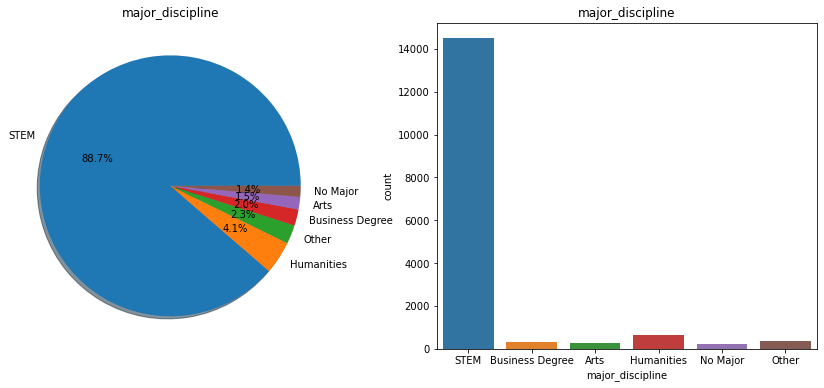

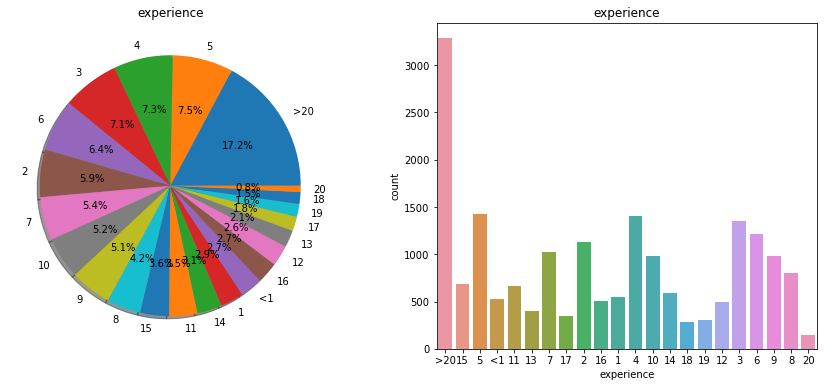

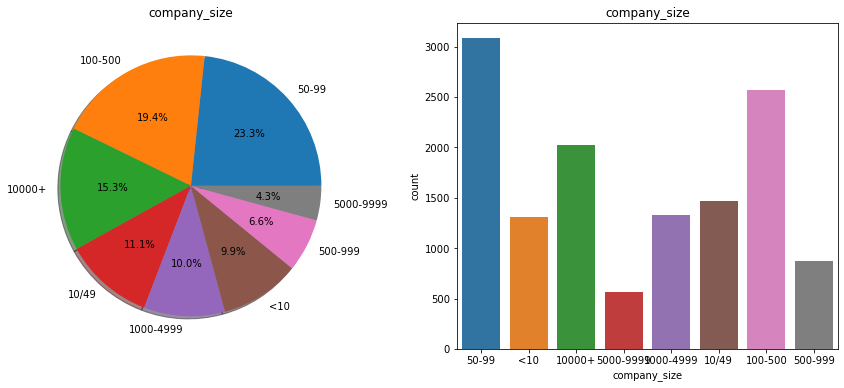

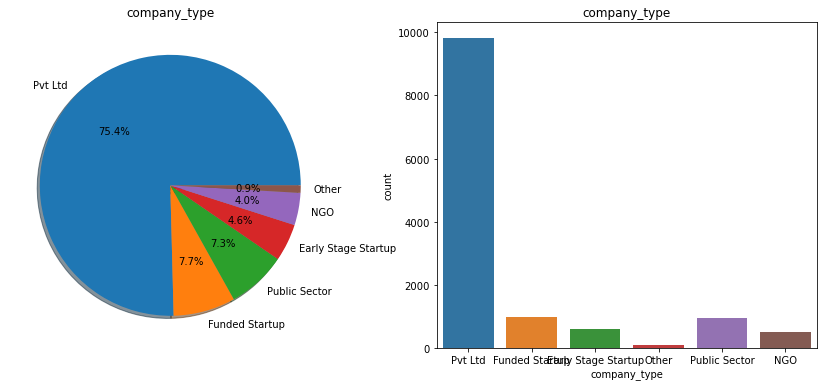

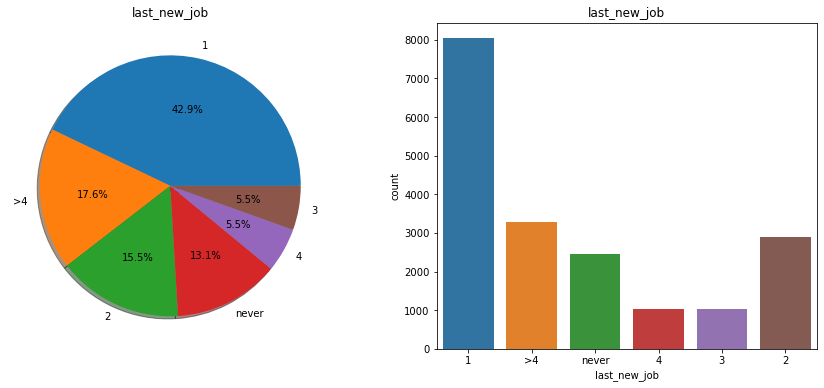

In [37]:
for i in df_cat:
    f,ax=plt.subplots(1,2,figsize=(15,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,radius=1)
    ax[0].set_title(i)
    ax[0].set_ylabel('')
    sns.countplot(x=df[i],ax=ax[1])
    ax[1].set_title(i);

### Bi-Variate Analysis of Categorical Variables vis-a-vis Target Variable

<IPython.core.display.Javascript object>

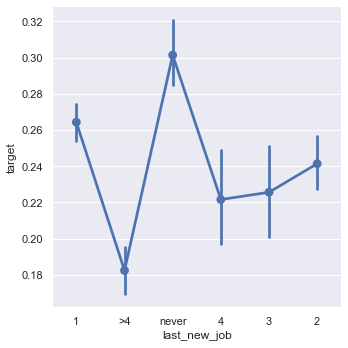

In [134]:
sns.catplot(x='last_new_job',y='target',data=df,kind='point');

# Numerical Variables

In [39]:
df_num=df.select_dtypes(include='number')
df_num

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0
...,...,...,...,...
19153,7386,0.878,42,1.0
19154,31398,0.920,52,1.0
19155,24576,0.920,44,0.0
19156,5756,0.802,97,0.0


In [40]:
df_num.count()

enrollee_id               19158
city_development_index    19158
training_hours            19158
target                    19158
dtype: int64

In [196]:
df_num.max()

enrollee_id               33380.000
city_development_index        0.949
training_hours              336.000
target                        1.000
dtype: float64

In [198]:
df_num.min()

enrollee_id               1.000
city_development_index    0.448
training_hours            1.000
target                    0.000
dtype: float64

In [197]:
df_num.mean()

enrollee_id               16875.358179
city_development_index        0.828848
training_hours               65.366896
target                        0.249348
dtype: float64

### Descriptive Statistics

In [41]:
# Basic statistical summary of numerical variables

df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.36,9616.29,1.00,8554.25,16982.5,25169.75,33380.00
city_development_index,19158.0,0.83,0.12,0.45,0.74,0.9,0.92,0.95
training_hours,19158.0,65.37,60.06,1.00,23.00,47.0,88.00,336.00
target,19158.0,0.25,0.43,0.00,0.00,0.0,0.00,1.00


# Distribution, Skewness and Kurtosis

In [ ]:
def rand_color():
    c = "#"+"".join(map(hex,random.choices(range(256), k=3))).replace("0x","")
    if len(c) != 7:
        return rand_color()
    return c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

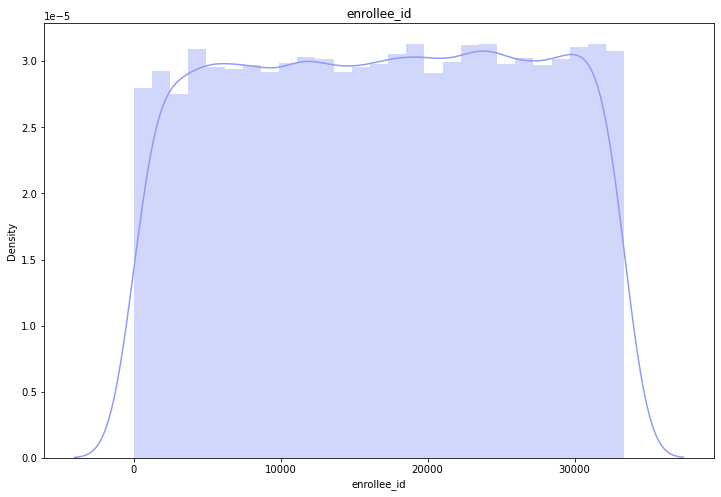

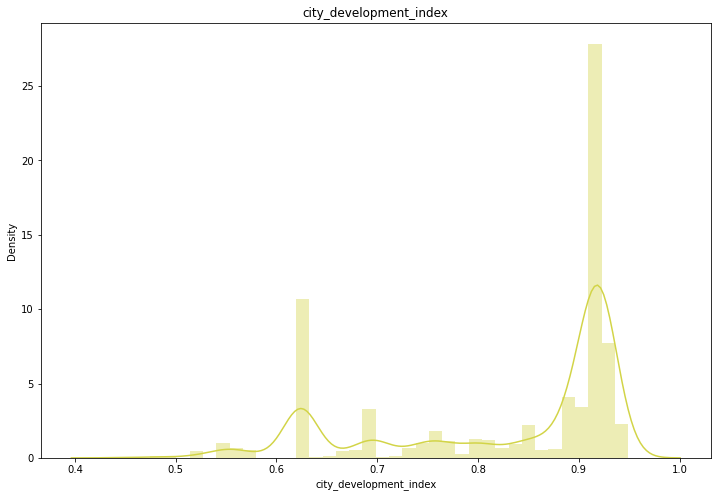

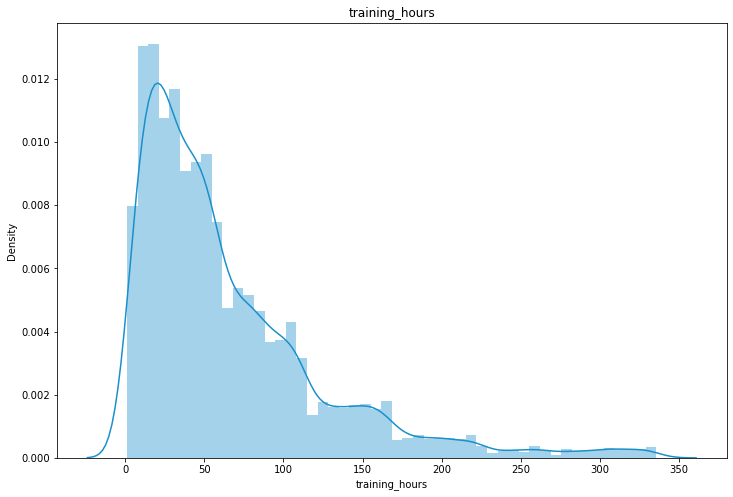

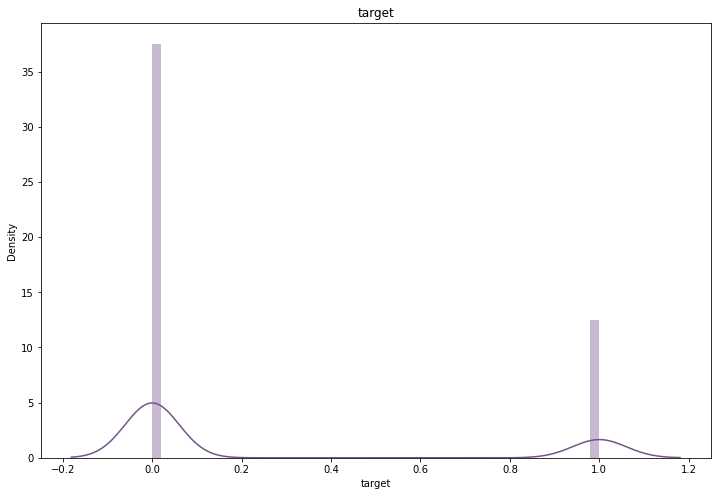

In [43]:
for i in df_num:
    plt.figure(figsize=(12,8))
    sns.distplot(df[i], color = rand_color()).set(title = i)

In [44]:
df.skew()

enrollee_id              -0.018391
city_development_index   -0.995428
training_hours            1.819237
target                    1.158815
dtype: float64

In [45]:
df.kurtosis()

enrollee_id              -1.196157
city_development_index   -0.538532
training_hours            3.840539
target                   -0.657217
dtype: float64

# Variance/ Standard Deviation

In [46]:
df.var()

enrollee_id               9.247308e+07
city_development_index    1.521812e-02
training_hours            3.607019e+03
target                    1.871831e-01
dtype: float64

In [47]:
df.std()

enrollee_id               9616.292592
city_development_index       0.123362
training_hours              60.058462
target                       0.432647
dtype: float64

In [48]:
quasi_constant_selector=VarianceThreshold(threshold=0)
quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [49]:
quasi_constant_selector.get_support()

array([ True,  True,  True,  True])

- True means no-constant features

- False means constant features

-  Out of 4 , none is constant feature

In [50]:
sum(quasi_constant_selector.get_support())

4

In [51]:
# Let's find quasi constant features which is none from dataset
quasi_constant_columns=[column for column in df_num.columns
                       if column not in df_num.columns[quasi_constant_selector.get_support()]]
print(len(quasi_constant_columns))

0


# Bi-Variate Analysis
### 1. Categorical-Categorical
### 2. Numerical-Numerical
### 3. Numerical-Categorical

### 1. Categorical-Categorical

## Categorical Variables VS Target Variable

In [81]:
df_cat

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

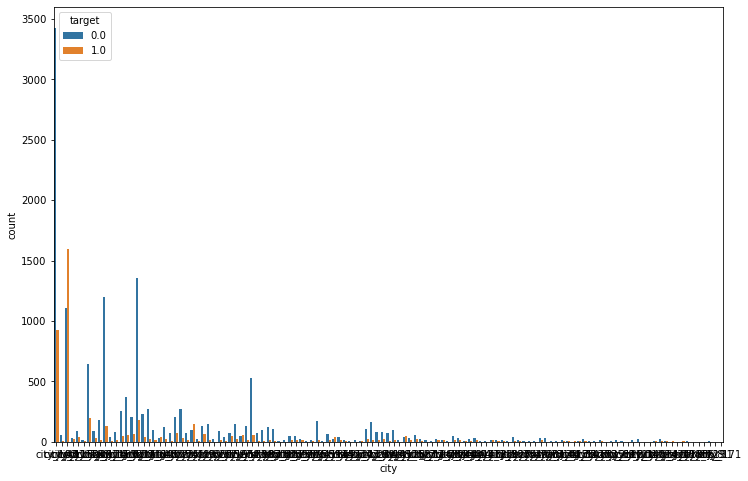

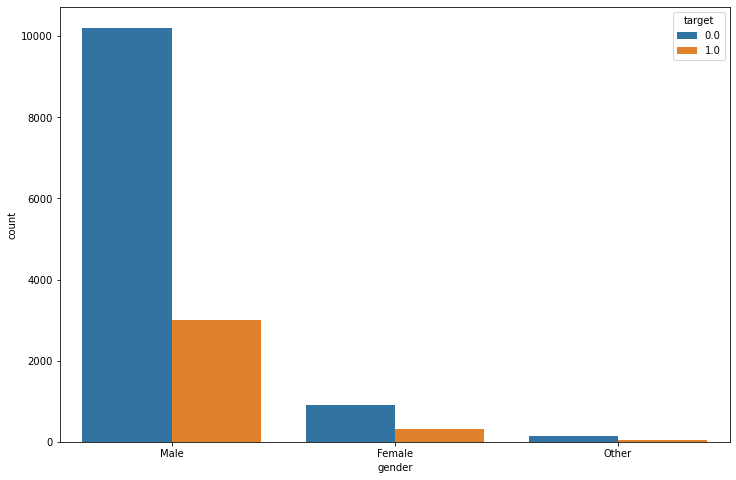

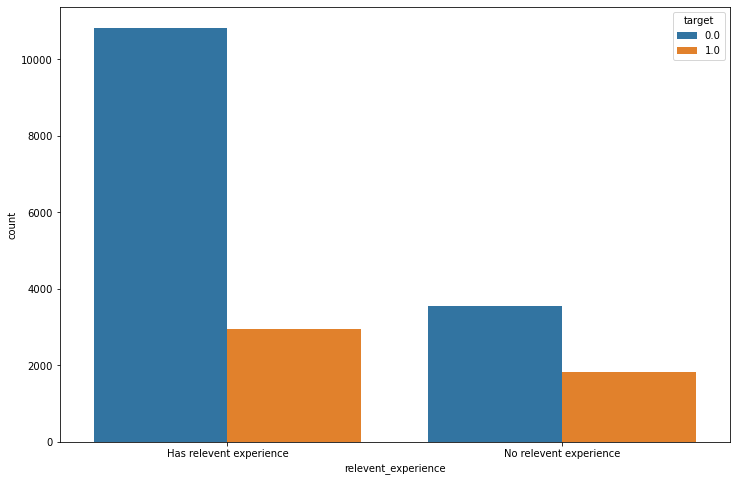

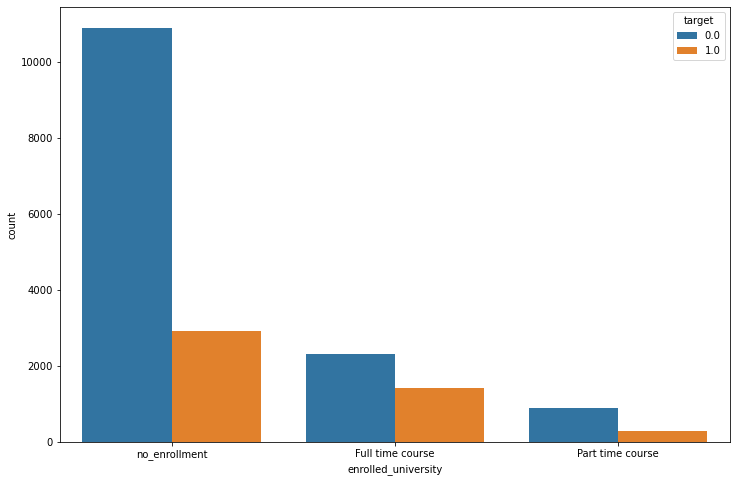

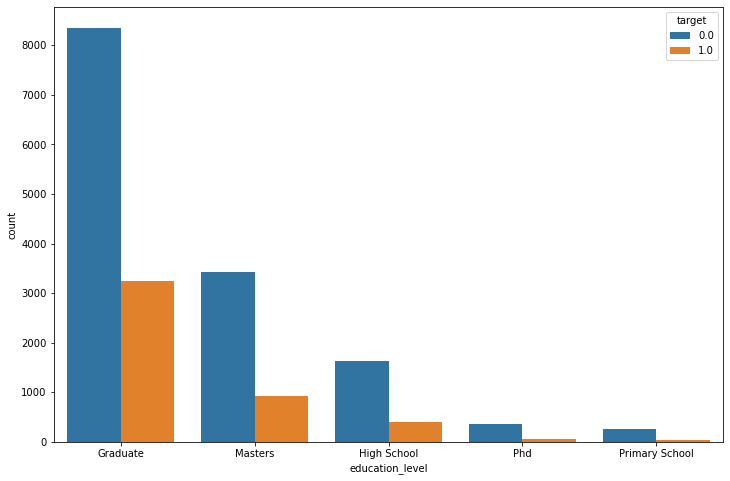

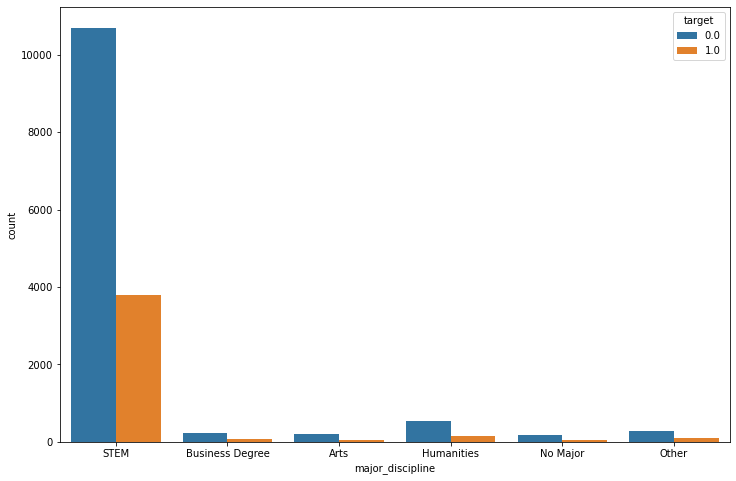

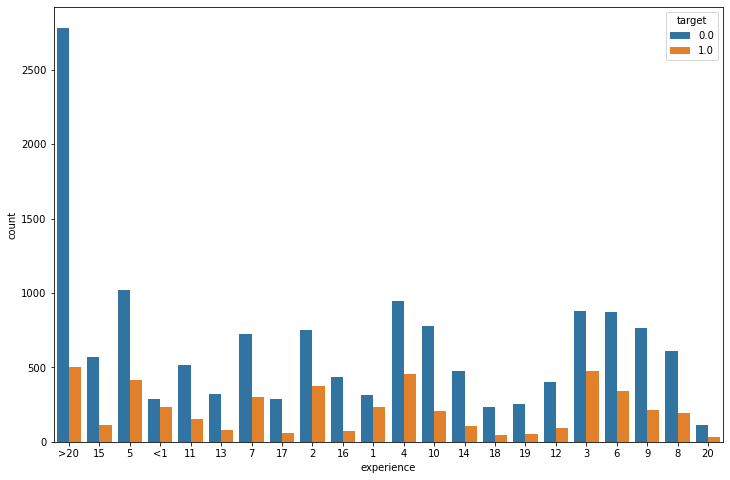

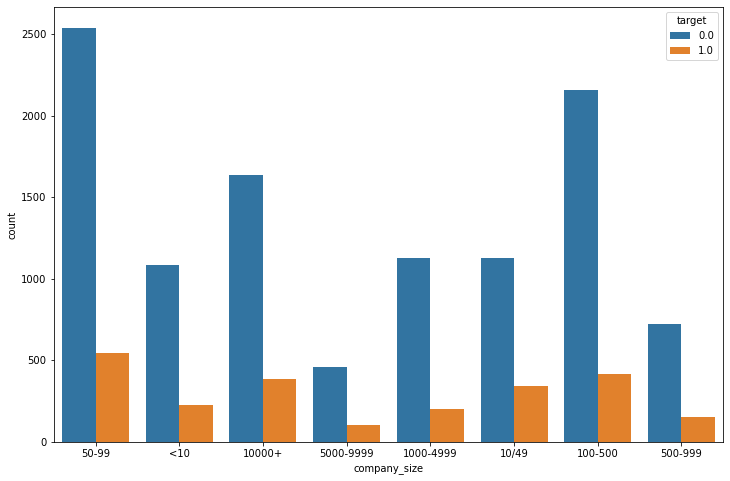

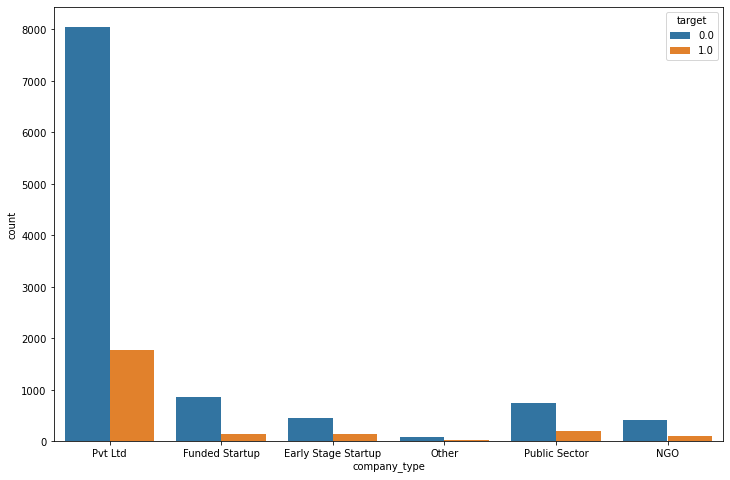

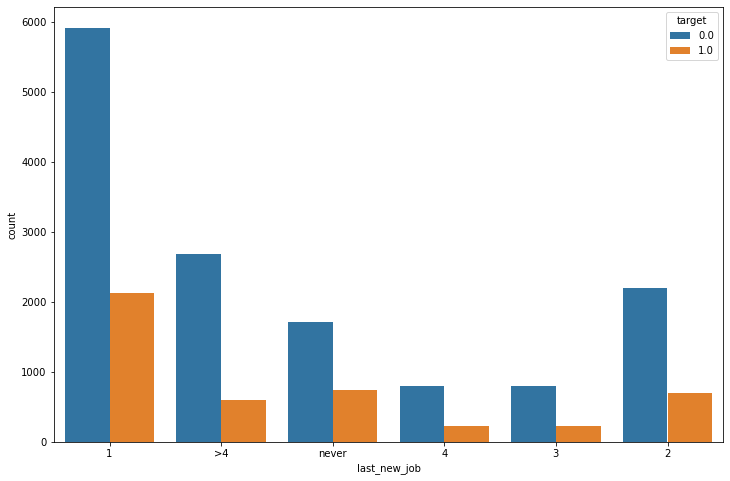

In [85]:
for i in df_cat:
    plt.figure(figsize=(12,8))
    sns.countplot(df[i], hue=df['target'])

In [95]:
categories=list(df['gender'].unique())
for category in categories:
    means=round(df[df['gender']==category]['target'].mean()*100,0)
    print(category,'--->',means)

Male ---> 23.0
nan ---> nan
Female ---> 26.0
Other ---> 26.0


- Females have more turn over rate.

In [98]:
categories=list(df['relevent_experience'].unique())
for category in categories:
    means=round(df[df['relevent_experience']==category]['target'].mean()*100,0)
    print(category,'--->',means)

Has relevent experience ---> 21.0
No relevent experience ---> 34.0


- The candidates having no relevant experience has more turn over rate.

In [99]:
categories=list(df['enrolled_university'].unique())
for category in categories:
    means=round(df[df['enrolled_university']==category]['target'].mean()*100,0)
    print(category,'--->',means)

no_enrollment ---> 21.0
Full time course ---> 38.0
nan ---> nan
Part time course ---> 25.0


- The candidates who have full time course enrolled in the university has more turn over rate.

In [97]:
categories=list(df['education_level'].unique())
for category in categories:
    means=round(df[df['education_level']==category]['target'].mean()*100,0)
    print(category,'--->',means)

Graduate ---> 28.0
Masters ---> 21.0
High School ---> 20.0
nan ---> nan
Phd ---> 14.0
Primary School ---> 13.0


[Turnover Rate]

- Graduate=28%
- Masters=21%
- High School=20%
- phd=14%
- Primary School=13%

It is observed that the turnover rate of college graduates is high as compared to very low and vey high level of education.

In [102]:
categories=list(df['major_discipline'].unique())
for category in categories:
    means=round(df[df['major_discipline']==category]['target'].mean()*100,0)
    print(category,'--->',means)

STEM ---> 26.0
Business Degree ---> 26.0
nan ---> nan
Arts ---> 21.0
Humanities ---> 21.0
No Major ---> 25.0
Other ---> 27.0


It is observed that students having other subjects as well as STEM,Business Degree have more turnover rate as compared to other disciplines.

In [103]:
categories=list(df['experience'].unique())
for category in categories:
    means=round(df[df['experience']==category]['target'].mean()*100,0)
    print(category,'--->',means)

>20 ---> 15.0
15 ---> 17.0
5 ---> 29.0
<1 ---> 45.0
11 ---> 23.0
13 ---> 19.0
7 ---> 29.0
17 ---> 17.0
2 ---> 33.0
16 ---> 14.0
1 ---> 42.0
4 ---> 33.0
10 ---> 21.0
14 ---> 18.0
18 ---> 15.0
19 ---> 17.0
12 ---> 19.0
3 ---> 35.0
6 ---> 28.0
9 ---> 22.0
8 ---> 24.0
20 ---> 22.0
nan ---> nan


- Maximum turn over rate is being observed for those candidates who have 1 year or less than 1 year experience.

In [104]:
categories=list(df['company_size'].unique())
for category in categories:
    means=round(df[df['company_size']==category]['target'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
50-99 ---> 18.0
<10 ---> 17.0
10000+ ---> 19.0
5000-9999 ---> 18.0
1000-4999 ---> 15.0
10/49 ---> 23.0
100-500 ---> 16.0
500-999 ---> 17.0


- No significant impact

In [105]:
categories=list(df['company_type'].unique())
for category in categories:
    means=round(df[df['company_type']==category]['target'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
Pvt Ltd ---> 18.0
Funded Startup ---> 14.0
Early Stage Startup ---> 24.0
Other ---> 24.0
Public Sector ---> 22.0
NGO ---> 19.0


- More chances of turn over of companies like Early Stage Startup, Public Sector and others.

In [106]:
categories=list(df['last_new_job'].unique())
for category in categories:
    means=round(df[df['last_new_job']==category]['target'].mean()*100,0)
    print(category,'--->',means)

1 ---> 26.0
>4 ---> 18.0
never ---> 30.0
4 ---> 22.0
3 ---> 23.0
2 ---> 24.0
nan ---> nan


- Those who have never changed the job , have more turnover rate.

# Categorical VS Categorical

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

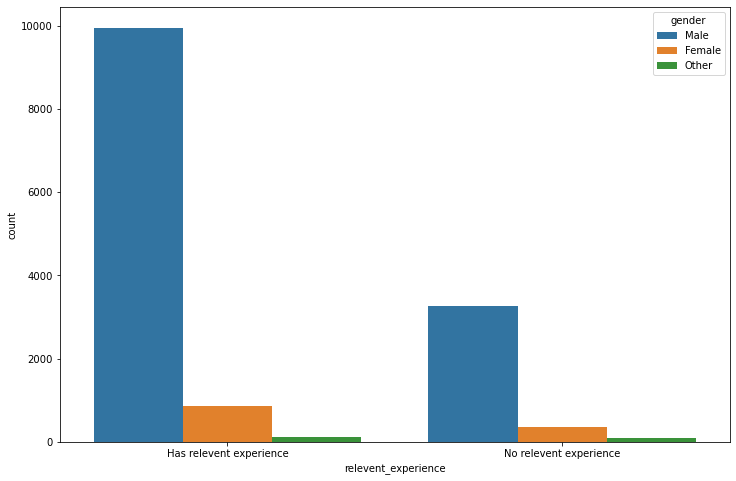

In [112]:
plt.figure(figsize=(12,8))
sns.countplot('relevent_experience',hue='gender',data=df);

In [113]:
pd.crosstab(df['relevent_experience'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
relevent_experience,,,
Has relevent experience,8.0,91.1,1.0
No relevent experience,9.9,87.9,2.3


- No. of males having relevant experience are more than having no relevant expereince.
- No. of females having relevant experience are less than having no relevant expereince.
- No. of males having relevant experience are significantly more than females.
- No. of males having no relevant experience are significantly more than females.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

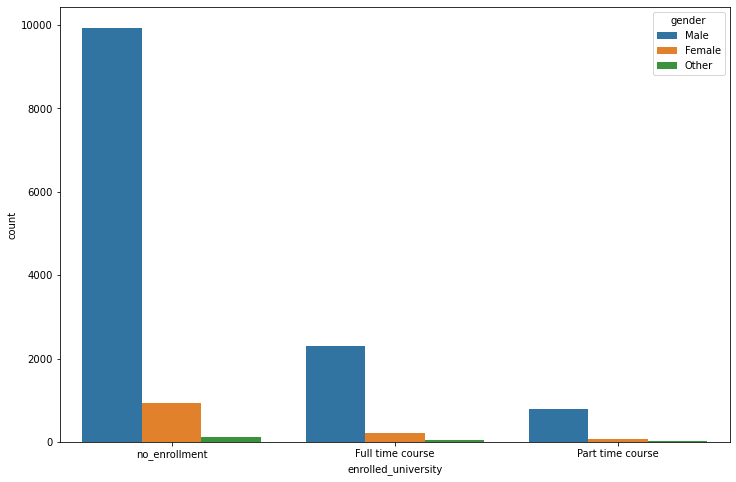

In [116]:
plt.figure(figsize=(12,8))
sns.countplot('enrolled_university',hue='gender',data=df);

In [115]:
pd.crosstab(df['enrolled_university'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
enrolled_university,,,
Full time course,8.4,89.8,1.9
Part time course,7.4,90.6,2.0
no_enrollment,8.5,90.4,1.0


- Males: no_enrollment> Part time course> Full time course
- Females: no_enrollment> Full time course> Part time course
- Males> Females (significantly) in Full time course, Part time course and no_enrollment.
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

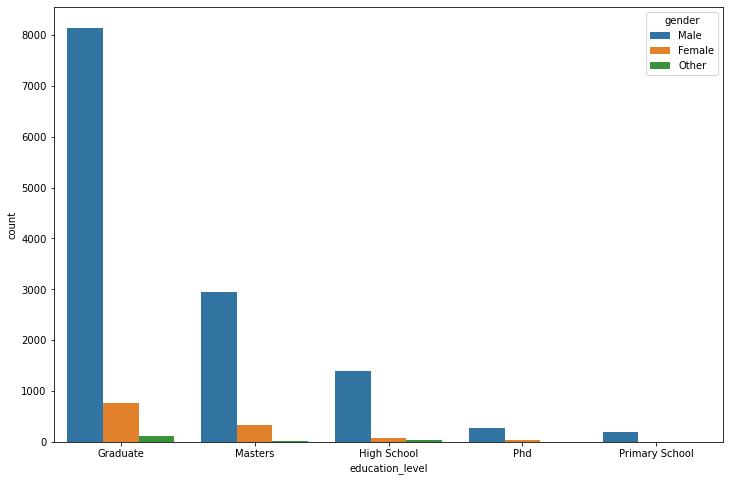

In [117]:
plt.figure(figsize=(12,8))
sns.countplot('education_level',hue='gender',data=df);

In [152]:
pd.crosstab(df['education_level'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
education_level,,,
Graduate,8.6,90.2,1.2
High School,4.5,93.3,2.2
Masters,10.2,89.0,0.8
Phd,14.2,84.6,1.2
Primary School,1.9,95.3,2.8


- Males: Primary School > High School > Graduate > Masters > Phd
- Females: Phd > Masters > Graduate> High School > Primary School  
- Males> Females (significantly) in all education levels.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

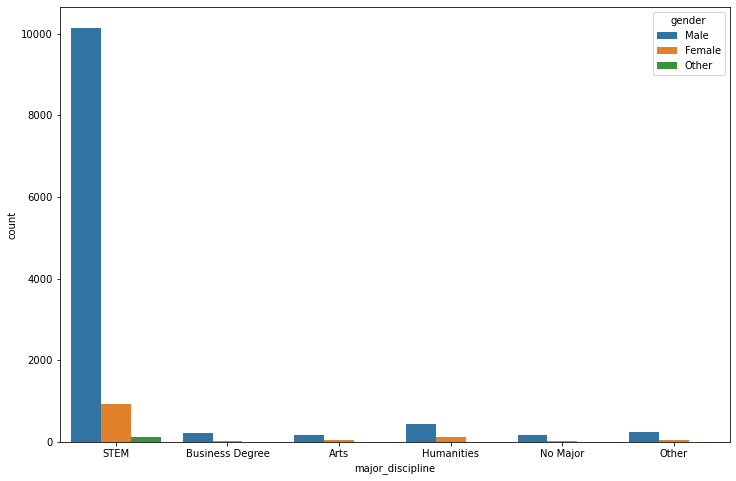

In [118]:
plt.figure(figsize=(12,8))
sns.countplot('major_discipline',hue='gender',data=df);

In [153]:
pd.crosstab(df['major_discipline'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
major_discipline,,,
Arts,17.7,78.8,3.4
Business Degree,9.8,89.0,1.2
Humanities,21.3,77.3,1.4
No Major,8.8,89.6,1.6
Other,12.4,85.2,2.4
STEM,8.3,90.7,1.0


- Males: STEM > No Major > Business Degree > Other > Arts > Humanities 
- Females: Humanities > Arts > Other > Business Degree > No Major > STEM 
- Males> Females (significantly) in all major disciplines.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

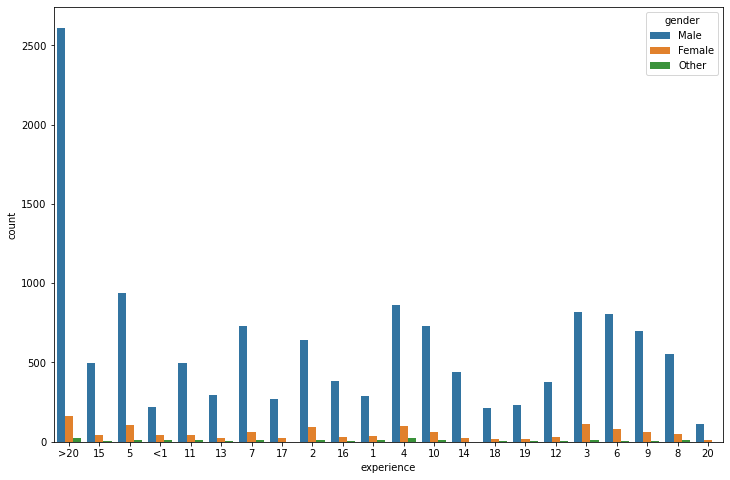

In [191]:
plt.figure(figsize=(12,8))
sns.countplot('experience',hue='gender',data=df);

In [154]:
pd.crosstab(df['experience'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
experience,,,
1,10.9,86.1,3.0
10,7.5,91.4,1.1
11,8.0,90.3,1.6
12,7.8,91.2,1.0
13,6.8,91.0,2.2
14,5.4,94.4,0.2
15,8.3,90.4,1.3
16,7.5,90.8,1.7
17,7.9,92.1,0.0


- Males> Females (significantly) in all categories of experience.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

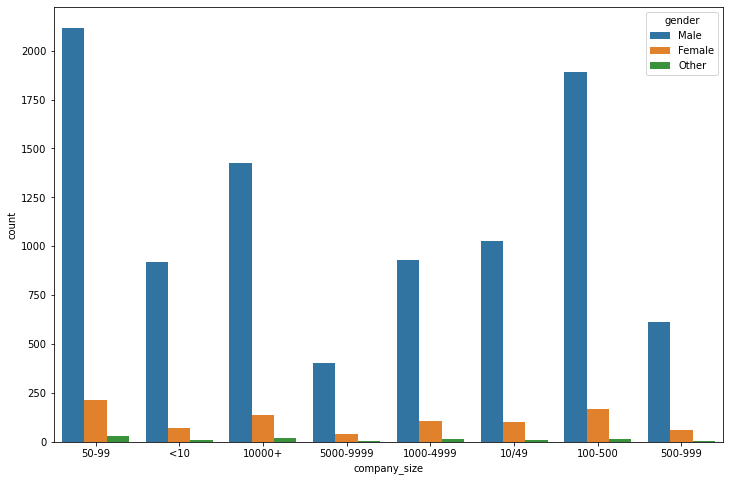

In [120]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='gender',data=df);

In [155]:
pd.crosstab(df['company_size'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
company_size,,,
10/49,8.9,90.1,1.1
100-500,8.0,91.4,0.6
1000-4999,10.2,88.6,1.2
10000+,8.7,89.9,1.4
50-99,9.1,89.6,1.3
500-999,9.3,90.0,0.7
5000-9999,8.9,90.0,1.1
<10,7.3,91.6,1.1


- Mostly males are working in company having size <10.
- Mostly females are working in company having size 1000-4999.
- The trend of females is very less in company having size <10.
- The trend of males is very less in company having size 1000-4999
- Almost 90 % Males are working in all companies and 10 % females are working.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

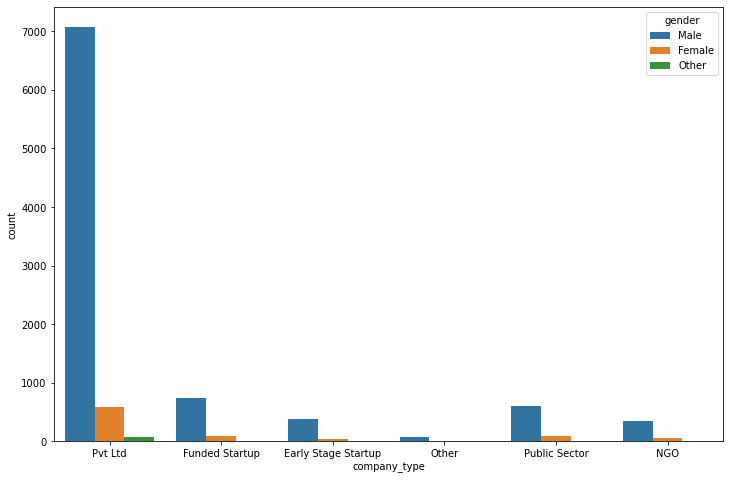

In [121]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='gender',data=df);

In [156]:
pd.crosstab(df['company_type'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
company_type,,,
Early Stage Startup,9.5,89.8,0.7
Funded Startup,10.9,87.7,1.4
NGO,13.4,85.6,1.0
Other,13.0,85.9,1.1
Public Sector,13.5,85.2,1.3
Pvt Ltd,7.5,91.4,1.0


- The strength of Males is greater than females in all types of companies.
- The strength of Males is greater in Pvt Ltd  and least in Public Sector than other types of companies.
- The strength of Females is greater in Public Sector and least in Pvt Ltd than other types of companies.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

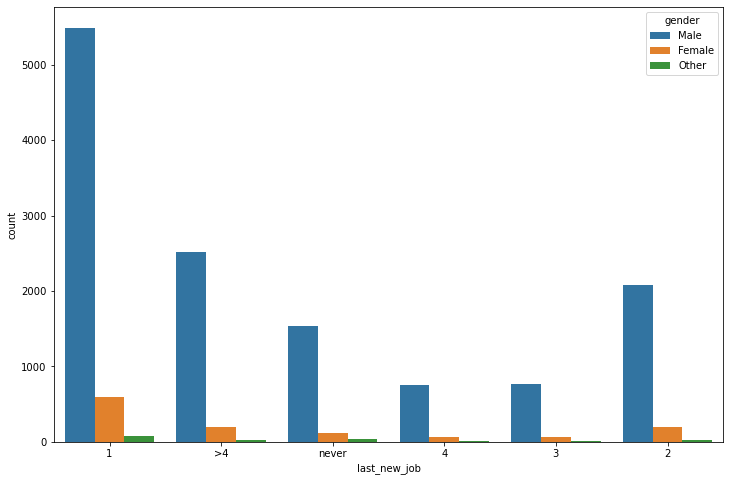

In [122]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='gender',data=df);

In [157]:
pd.crosstab(df['last_new_job'], df['gender']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

gender,Female,Male,Other
last_new_job,,,
1,9.7,89.0,1.3
2,8.4,90.6,1.1
3,7.4,91.2,1.4
4,8.1,90.8,1.1
>4,7.0,92.0,1.0
never,7.2,90.8,2.1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

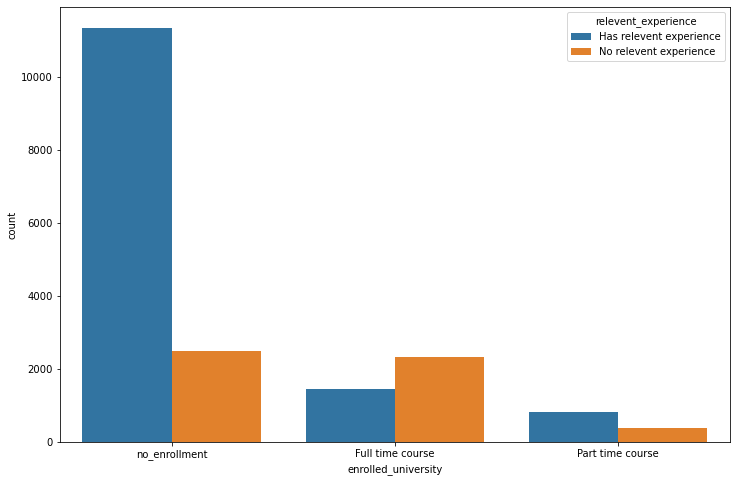

In [123]:
plt.figure(figsize=(12,8))
sns.countplot('enrolled_university',hue='relevent_experience',data=df);

In [158]:
pd.crosstab(df['enrolled_university'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
enrolled_university,,
Full time course,38.4,61.6
Part time course,68.2,31.8
no_enrollment,82.0,18.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

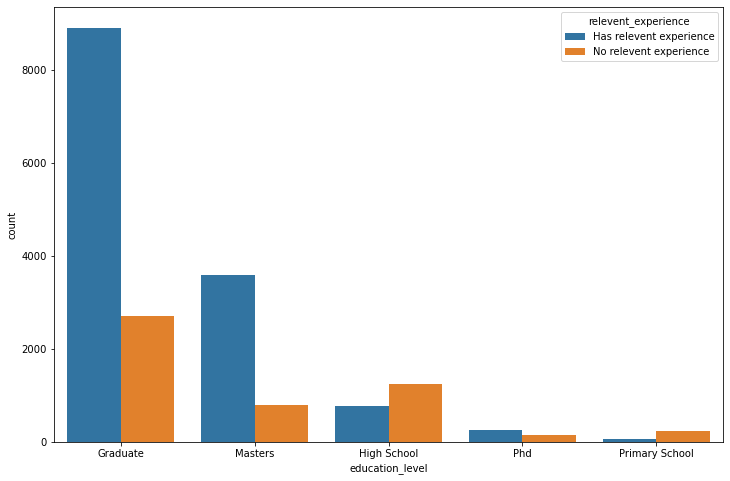

In [124]:
plt.figure(figsize=(12,8))
sns.countplot('education_level',hue='relevent_experience',data=df);

In [159]:
pd.crosstab(df['education_level'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
education_level,,
Graduate,76.7,23.3
High School,38.7,61.3
Masters,82.0,18.0
Phd,62.6,37.4
Primary School,21.4,78.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

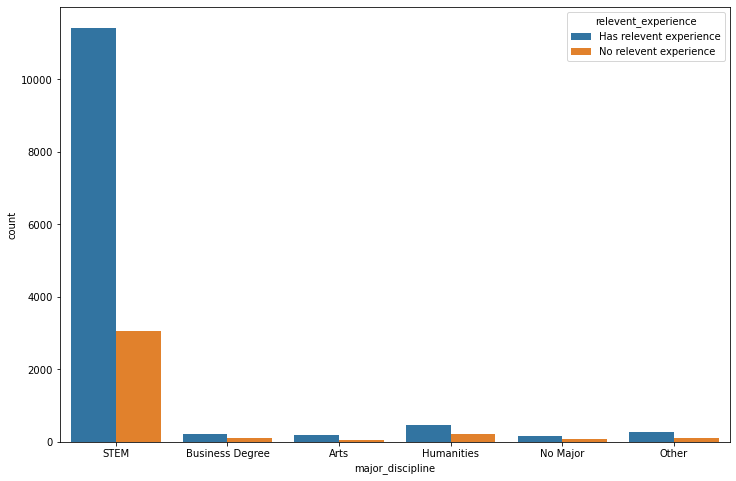

In [125]:
plt.figure(figsize=(12,8))
sns.countplot('major_discipline',hue='relevent_experience',data=df);

In [160]:
pd.crosstab(df['major_discipline'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
major_discipline,,
Arts,77.1,22.9
Business Degree,66.4,33.6
Humanities,69.5,30.5
No Major,70.0,30.0
Other,68.5,31.5
STEM,78.8,21.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

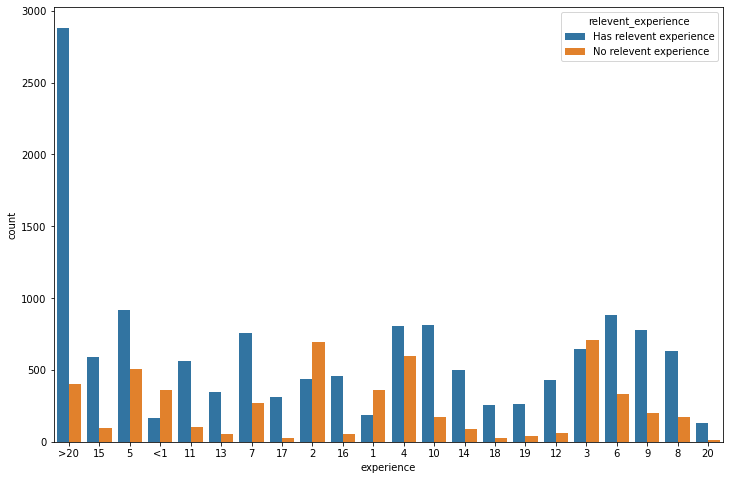

In [126]:
plt.figure(figsize=(12,8))
sns.countplot('experience',hue='relevent_experience',data=df);

In [161]:
pd.crosstab(df['experience'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
experience,,
1,34.6,65.4
10,82.2,17.8
11,84.9,15.1
12,87.7,12.3
13,86.2,13.8
14,85.2,14.8
15,85.6,14.4
16,89.8,10.2
17,91.8,8.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

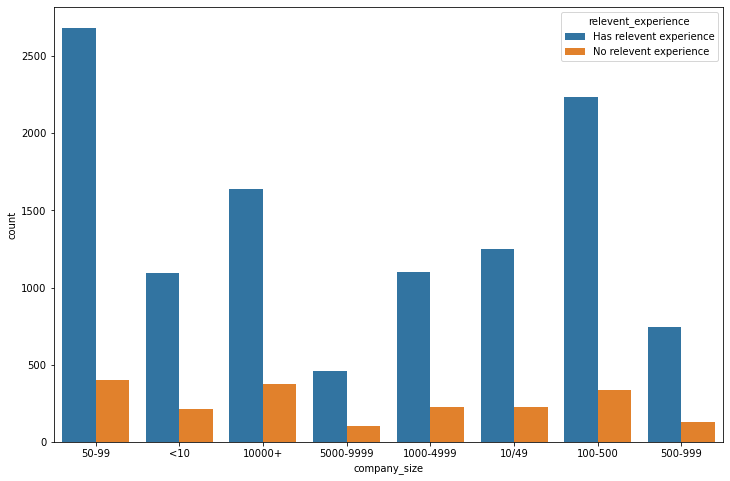

In [127]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='relevent_experience',data=df);

In [162]:
pd.crosstab(df['company_size'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
company_size,,
10/49,84.8,15.2
100-500,86.9,13.1
1000-4999,83.0,17.0
10000+,81.3,18.7
50-99,87.0,13.0
500-999,84.9,15.1
5000-9999,81.9,18.1
<10,83.9,16.1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

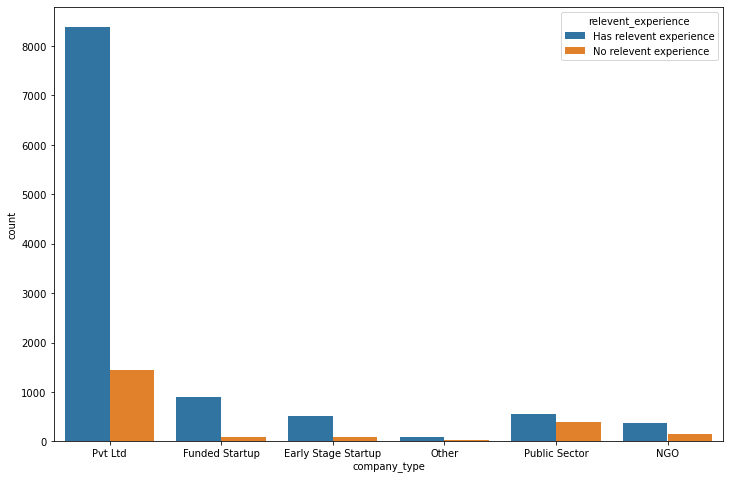

In [128]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='relevent_experience',data=df);

In [163]:
pd.crosstab(df['company_type'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
company_type,,
Early Stage Startup,84.4,15.6
Funded Startup,90.4,9.6
NGO,70.1,29.9
Other,81.0,19.0
Public Sector,58.4,41.6
Pvt Ltd,85.4,14.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

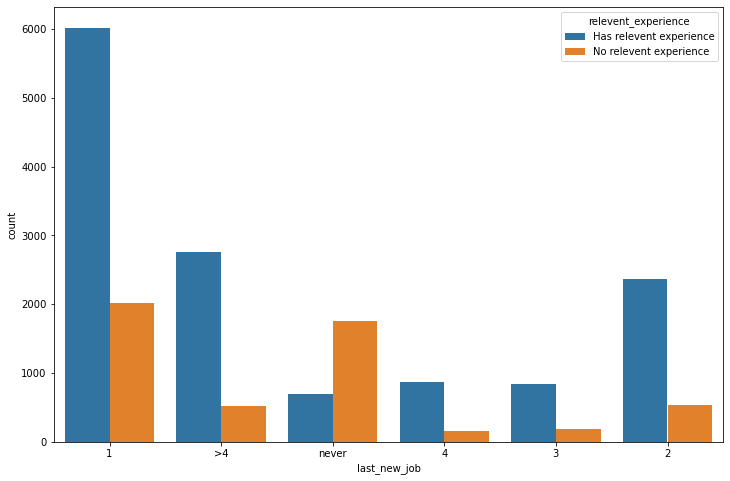

In [129]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='relevent_experience',data=df);

In [164]:
pd.crosstab(df['last_new_job'], df['relevent_experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

relevent_experience,Has relevent experience,No relevent experience
last_new_job,,
1,74.9,25.1
2,81.7,18.3
3,81.9,18.1
4,85.1,14.9
>4,84.0,16.0
never,28.6,71.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

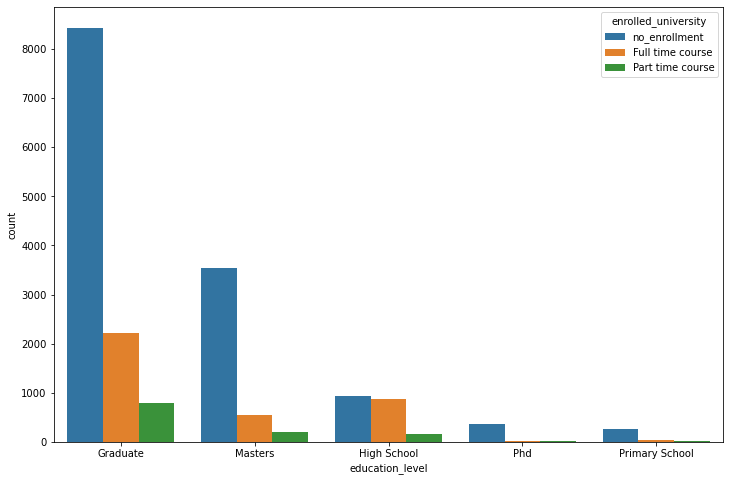

In [130]:
plt.figure(figsize=(12,8))
sns.countplot('education_level',hue='enrolled_university',data=df);

In [165]:
pd.crosstab(df['education_level'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
education_level,,,
Graduate,19.3,6.9,73.8
High School,43.9,8.4,47.7
Masters,12.9,4.7,82.3
Phd,6.1,2.9,90.9
Primary School,11.0,3.7,85.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

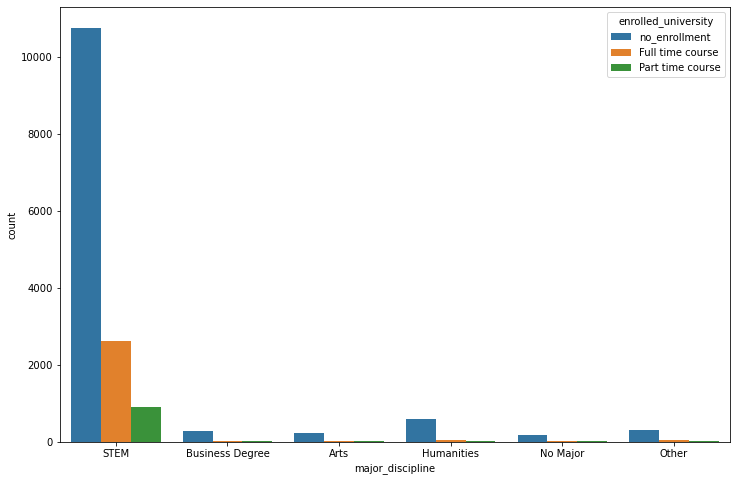

In [131]:
plt.figure(figsize=(12,8))
sns.countplot('major_discipline',hue='enrolled_university',data=df);

In [166]:
pd.crosstab(df['major_discipline'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
major_discipline,,,
Arts,5.2,4.8,90.0
Business Degree,8.0,5.8,86.2
Humanities,6.5,4.1,89.4
No Major,8.7,5.9,85.4
Other,15.9,4.8,79.3
STEM,18.3,6.4,75.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

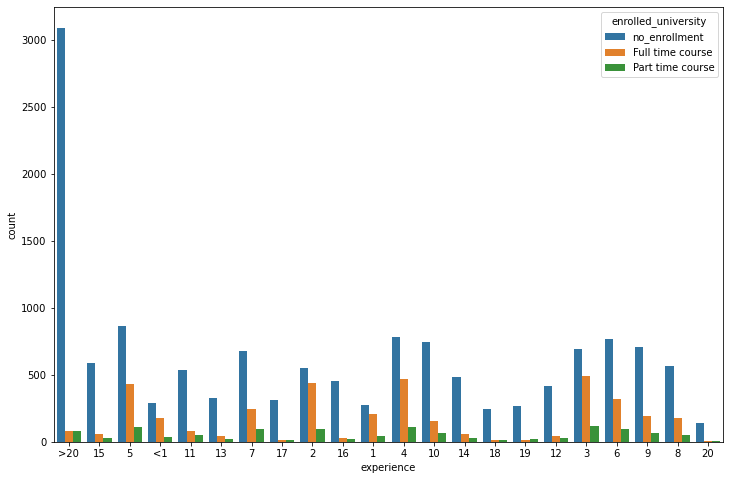

In [132]:
plt.figure(figsize=(12,8))
sns.countplot('experience',hue='enrolled_university',data=df);

In [167]:
pd.crosstab(df['experience'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
experience,,,
1,39.8,7.9,52.3
10,16.0,6.9,77.0
11,11.8,7.6,80.6
12,8.2,5.3,86.4
13,10.5,5.9,83.7
14,10.4,5.4,84.3
15,8.3,4.7,87.0
16,5.8,4.4,89.9
17,3.8,4.4,91.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

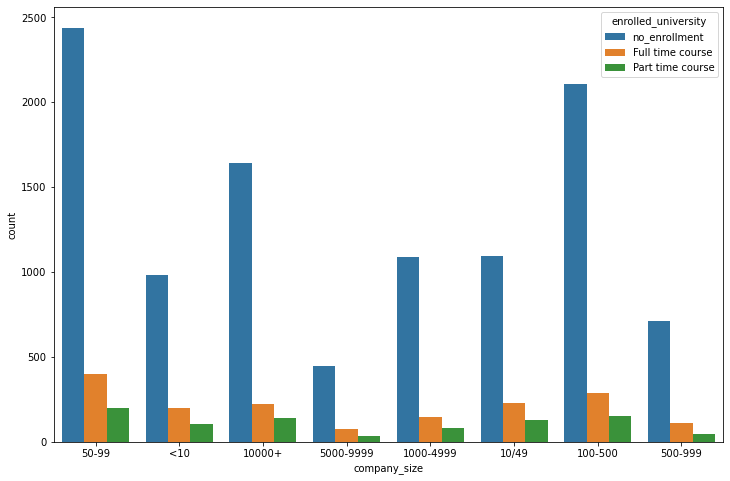

In [133]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='enrolled_university',data=df);

In [168]:
pd.crosstab(df['company_size'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
company_size,,,
10/49,15.7,8.8,75.4
100-500,11.3,5.9,82.8
1000-4999,11.2,6.2,82.5
10000+,11.1,7.0,81.9
50-99,13.2,6.5,80.3
500-999,12.9,5.5,81.6
5000-9999,14.0,5.7,80.3
<10,15.6,8.2,76.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

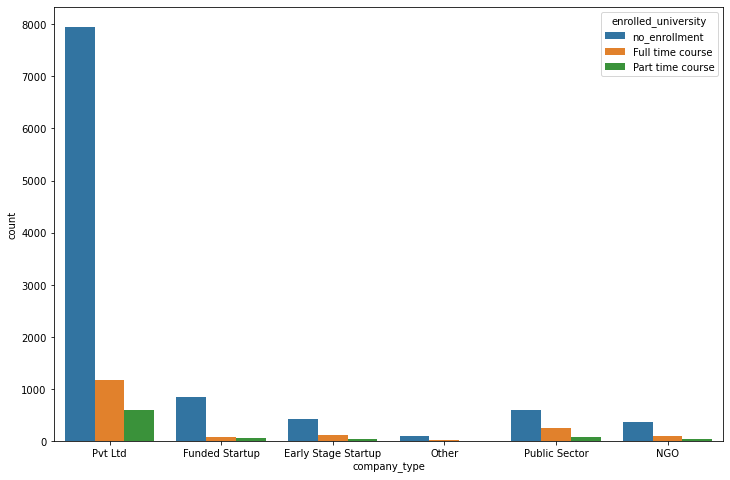

In [134]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='enrolled_university',data=df);

In [169]:
pd.crosstab(df['company_type'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
company_type,,,
Early Stage Startup,20.8,8.3,70.9
Funded Startup,9.3,5.7,85.1
NGO,20.0,9.0,71.0
Other,17.4,5.0,77.7
Public Sector,26.6,9.7,63.7
Pvt Ltd,12.1,6.2,81.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

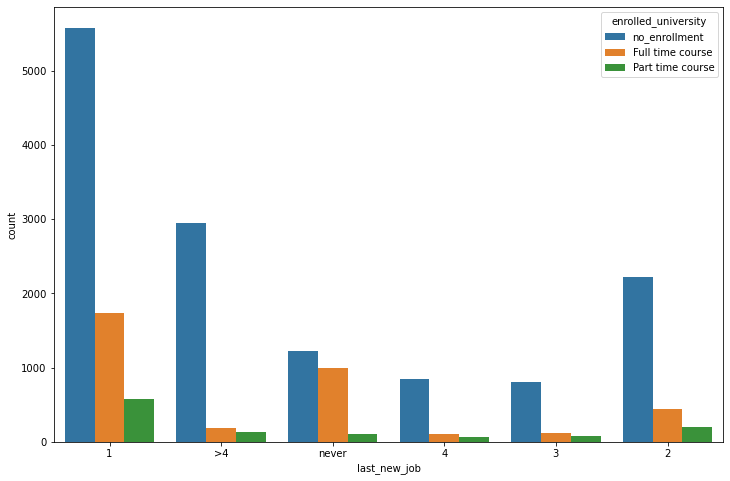

In [135]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='enrolled_university',data=df);

In [170]:
pd.crosstab(df['last_new_job'], df['enrolled_university']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

enrolled_university,Full time course,Part time course,no_enrollment
last_new_job,,,
1,22.0,7.4,70.6
2,15.4,7.2,77.4
3,11.7,7.9,80.4
4,11.0,6.2,82.8
>4,5.6,4.0,90.4
never,42.8,4.4,52.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

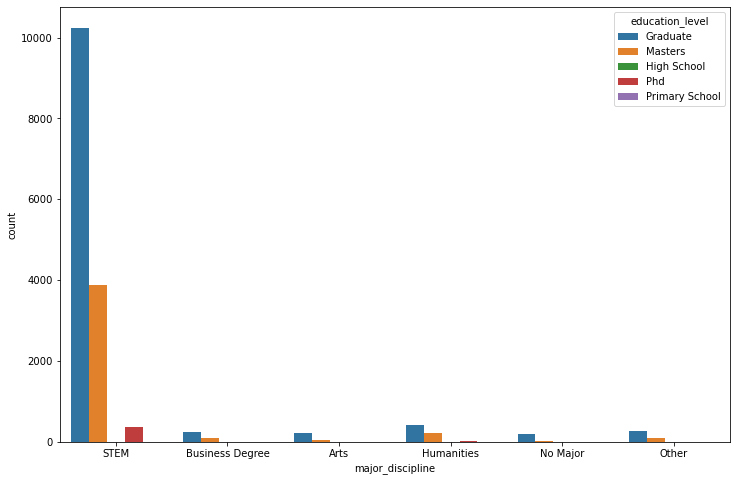

In [136]:
plt.figure(figsize=(12,8))
sns.countplot('major_discipline',hue='education_level',data=df);

In [171]:
pd.crosstab(df['major_discipline'], df['education_level']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

education_level,Graduate,Masters,Phd
major_discipline,,,
Arts,82.2,16.6,1.2
Business Degree,72.8,26.3,0.9
Humanities,62.8,33.6,3.6
No Major,87.0,13.0,0.0
Other,71.4,26.2,2.4
STEM,70.7,26.7,2.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

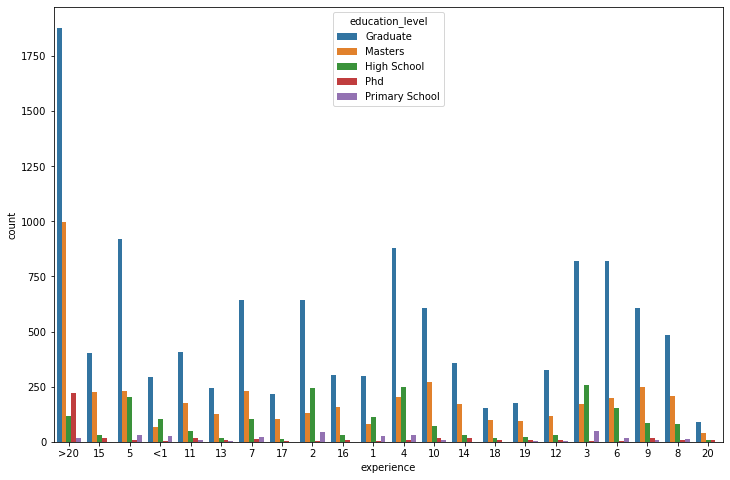

In [137]:
plt.figure(figsize=(12,8))
sns.countplot('experience',hue='education_level',data=df);

In [172]:
pd.crosstab(df['experience'], df['education_level']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

education_level,Graduate,High School,Masters,Phd,Primary School
experience,,,,,
1,57.6,21.5,15.3,0.6,5.0
10,62.5,7.3,27.8,1.8,0.6
11,62.3,7.5,26.8,2.3,1.2
12,66.9,6.2,24.2,1.6,1.0
13,61.5,4.0,31.7,1.8,1.0
14,61.4,5.7,29.8,2.9,0.2
15,59.6,4.7,33.2,2.4,0.1
16,61.1,6.0,31.3,1.4,0.2
17,64.0,4.2,30.4,1.5,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

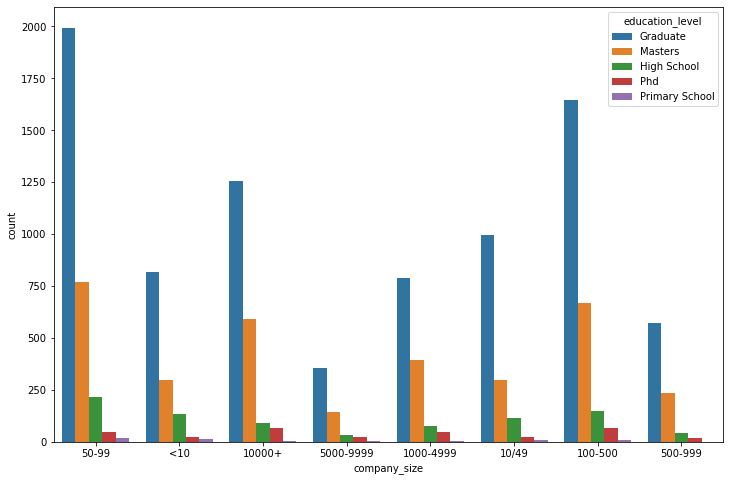

In [138]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='education_level',data=df);

In [173]:
pd.crosstab(df['company_size'], df['education_level']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

education_level,Graduate,High School,Masters,Phd,Primary School
company_size,,,,,
10/49,69.0,8.0,20.7,1.7,0.6
100-500,64.8,5.8,26.4,2.6,0.4
1000-4999,60.0,5.9,30.0,3.8,0.4
10000+,62.5,4.6,29.3,3.3,0.2
50-99,65.5,7.1,25.2,1.6,0.6
500-999,65.9,4.7,27.1,2.2,0.1
5000-9999,64.3,5.6,25.5,4.3,0.4
<10,63.6,10.4,23.0,1.9,1.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

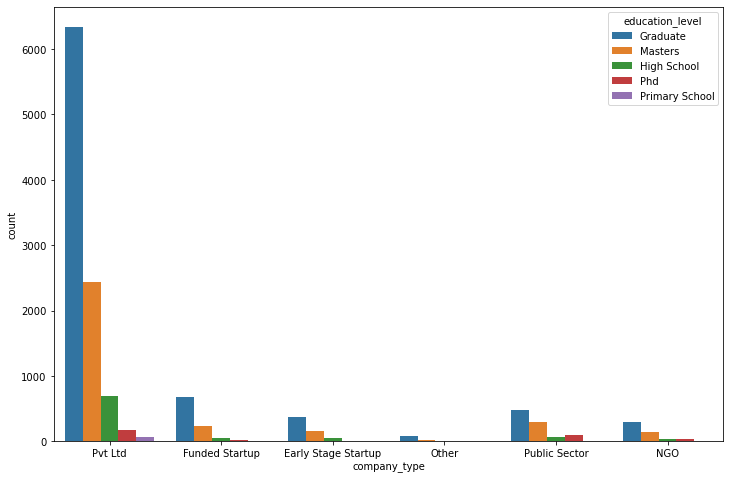

In [139]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='education_level',data=df);

In [174]:
pd.crosstab(df['company_type'], df['education_level']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

education_level,Graduate,High School,Masters,Phd,Primary School
company_type,,,,,
Early Stage Startup,62.5,8.8,25.8,1.7,1.2
Funded Startup,68.0,5.4,23.4,2.5,0.7
NGO,58.7,5.6,29.0,6.4,0.4
Other,67.8,9.3,21.2,0.8,0.8
Public Sector,50.9,6.9,31.5,10.3,0.4
Pvt Ltd,65.3,7.1,25.1,1.7,0.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

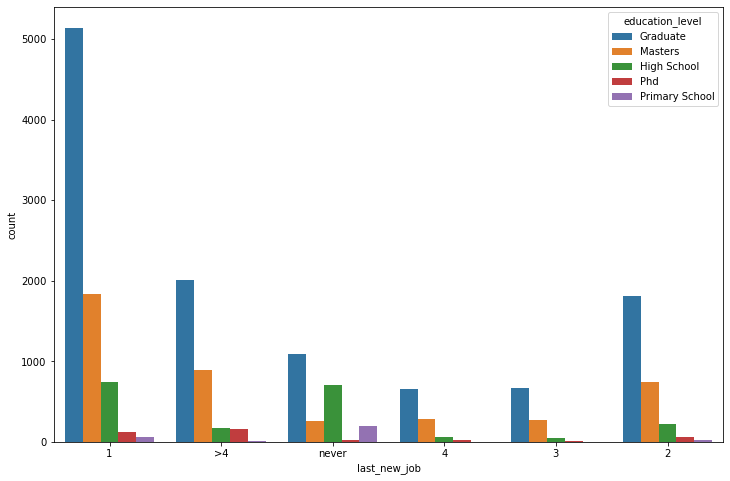

In [142]:

plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='education_level',data=df);

In [175]:
pd.crosstab(df['last_new_job'], df['education_level']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

education_level,Graduate,High School,Masters,Phd,Primary School
last_new_job,,,,,
1,65.0,9.4,23.2,1.6,0.8
2,63.3,7.7,26.1,2.1,0.8
3,66.0,5.3,26.7,1.7,0.3
4,63.8,5.7,27.5,2.5,0.4
>4,62.1,5.2,27.7,4.8,0.3
never,48.0,31.1,11.3,1.0,8.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

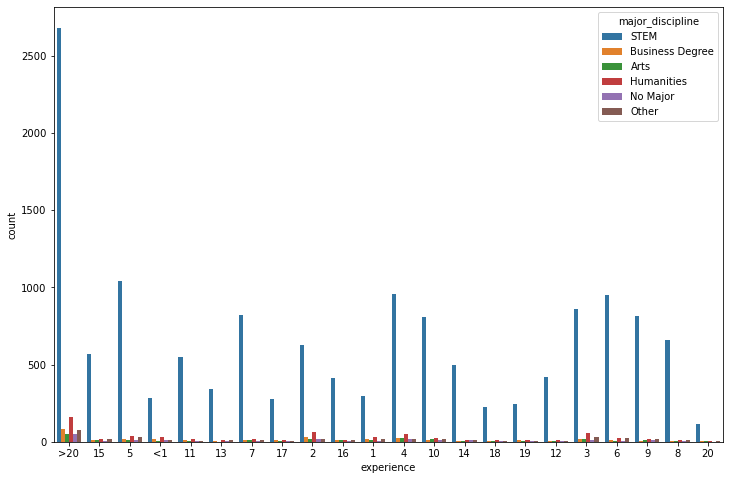

In [143]:
plt.figure(figsize=(12,8))
sns.countplot('experience',hue='major_discipline',data=df);

In [176]:
pd.crosstab(df['experience'], df['major_discipline']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
experience,,,,,,
1,2.9,4.0,8.2,2.1,4.2,78.6
10,1.9,1.6,2.9,1.0,1.9,90.7
11,1.3,2.2,3.0,0.8,1.3,91.3
12,1.3,1.3,2.0,0.4,1.5,93.4
13,0.3,1.3,3.2,0.8,3.4,91.0
14,1.5,1.3,2.6,2.4,1.6,90.7
15,2.2,1.9,3.1,1.1,2.7,89.1
16,2.4,1.9,3.0,1.7,1.9,89.1
17,1.9,2.8,4.3,2.2,2.2,86.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

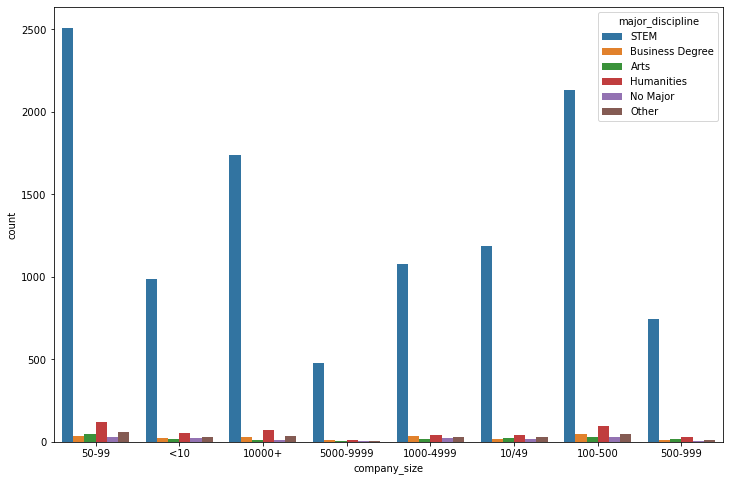

In [144]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='major_discipline',data=df);

In [177]:
pd.crosstab(df['company_size'], df['major_discipline']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
company_size,,,,,,
10/49,1.9,1.4,3.3,1.3,2.3,89.9
100-500,1.3,1.9,4.0,1.3,2.1,89.5
1000-4999,1.6,3.1,3.2,1.9,2.2,88.0
10000+,0.7,1.6,3.8,0.7,2.0,91.1
50-99,1.7,1.3,4.3,1.1,2.1,89.5
500-999,2.1,1.6,3.9,0.7,1.6,90.2
5000-9999,1.0,2.5,2.5,1.1,1.5,91.4
<10,1.6,2.0,4.7,2.0,2.6,87.1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

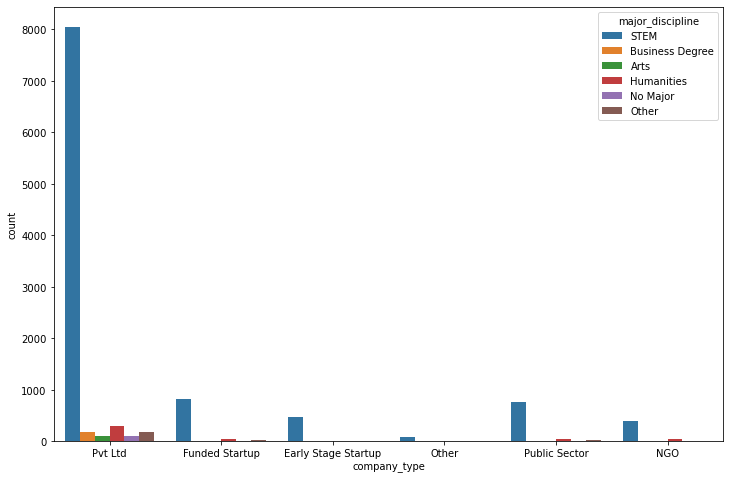

In [145]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='major_discipline',data=df);

In [178]:
pd.crosstab(df['company_type'], df['major_discipline']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
company_type,,,,,,
Early Stage Startup,2.5,0.6,3.0,1.9,1.5,90.6
Funded Startup,1.8,1.8,5.3,0.6,2.1,88.2
NGO,2.7,1.6,8.8,1.6,2.1,83.2
Other,0.9,1.9,8.5,1.9,3.8,83.0
Public Sector,1.4,1.1,5.4,0.9,2.6,88.5
Pvt Ltd,1.3,2.0,3.4,1.2,2.0,90.1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

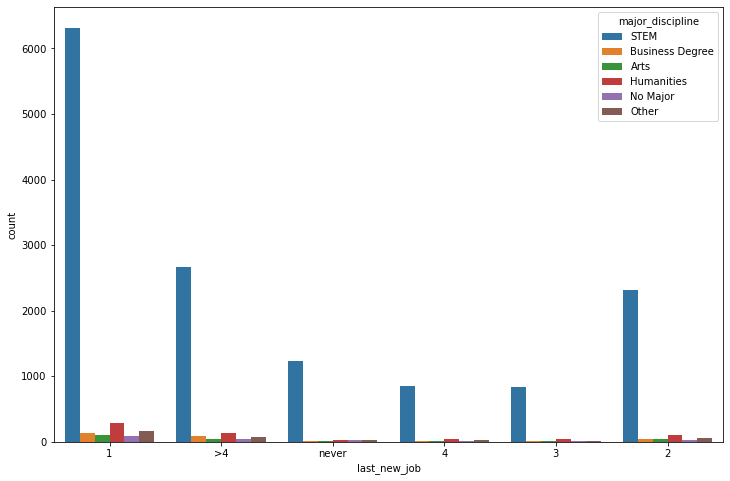

In [146]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='major_discipline',data=df);

In [179]:
pd.crosstab(df['last_new_job'], df['major_discipline']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
last_new_job,,,,,,
1,1.5,2.0,4.1,1.2,2.2,89.0
2,1.8,1.8,4.2,0.9,2.5,88.7
3,1.8,1.8,4.9,2.0,1.8,87.8
4,1.8,1.3,4.6,1.5,2.4,88.5
>4,1.5,2.8,4.6,1.5,2.4,87.1
never,1.2,1.5,2.3,1.9,2.6,90.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

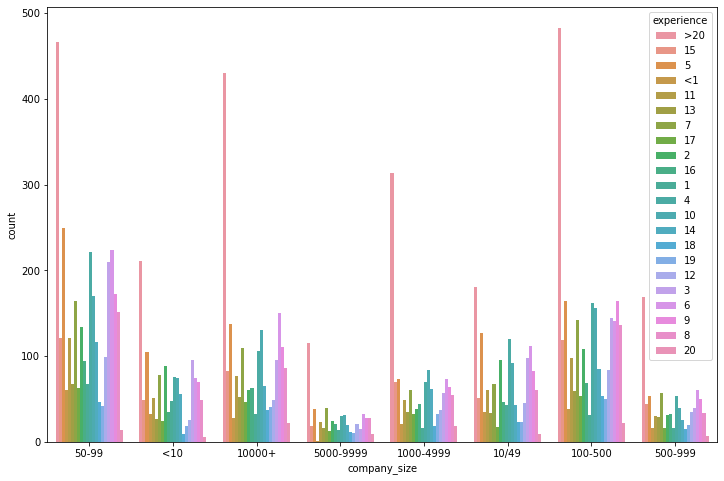

In [147]:
plt.figure(figsize=(12,8))
sns.countplot('company_size',hue='experience',data=df);

In [180]:
pd.crosstab(df['company_size'], df['experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

experience,1,10,11,12,13,14,15,16,17,18,...,20,3,4,5,6,7,8,9,<1,>20
company_size,,,,,,,,,,,,,,,,,,,,,
10/49,2.9,6.3,4.2,3.1,2.3,2.9,3.5,3.1,1.2,1.6,...,0.6,6.7,8.2,8.7,7.6,4.6,4.1,5.7,2.4,12.3
100-500,1.2,6.1,3.8,3.3,2.3,3.3,4.6,2.7,2.1,2.1,...,0.9,5.6,6.3,6.4,5.5,5.5,5.3,6.4,1.5,18.8
1000-4999,1.2,6.3,3.7,2.8,2.6,4.7,5.3,3.3,2.4,1.4,...,1.4,4.3,5.3,5.5,5.5,4.5,4.2,4.8,1.6,23.7
10000+,1.6,6.5,3.8,2.4,2.6,3.2,4.1,3.1,2.3,1.8,...,1.1,4.8,5.3,6.8,7.5,5.4,4.3,5.5,1.4,21.4
50-99,2.2,5.5,3.9,3.2,2.2,3.8,3.9,3.1,2.0,1.5,...,0.5,6.8,7.2,8.1,7.3,5.3,4.9,5.6,1.9,15.1
500-999,1.8,4.5,3.4,4.0,3.3,3.0,5.0,3.8,1.8,1.7,...,0.8,4.5,6.2,6.2,6.9,6.5,3.9,5.7,1.8,19.3
5000-9999,2.5,5.5,4.1,3.8,2.9,3.6,3.4,3.8,2.3,2.1,...,1.6,2.7,5.4,6.8,5.7,7.0,5.0,5.0,0.2,20.6
<10,3.7,5.8,3.9,2.0,2.1,4.3,3.8,2.7,1.8,0.7,...,0.5,7.4,5.8,8.1,5.8,6.0,3.8,5.4,2.5,16.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

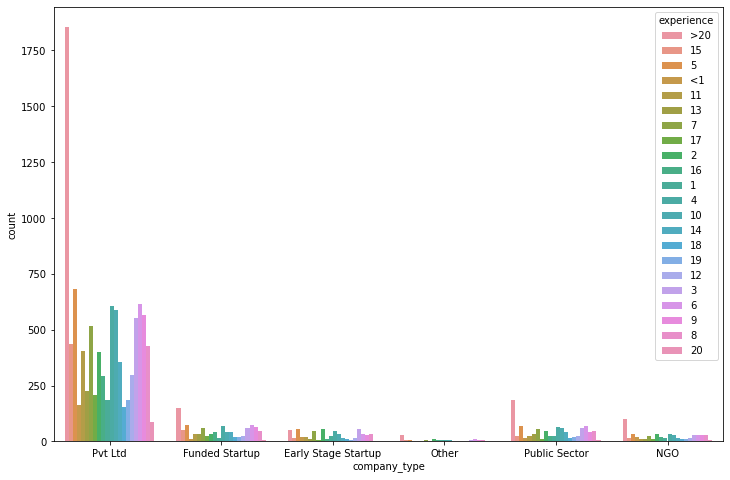

In [148]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='experience',data=df);

In [181]:
pd.crosstab(df['company_type'], df['experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

experience,1,10,11,12,13,14,15,16,17,18,...,20,3,4,5,6,7,8,9,<1,>20
company_type,,,,,,,,,,,,,,,,,,,,,
Early Stage Startup,4.0,5.2,3.5,2.8,1.8,2.5,2.5,1.8,1.0,1.7,...,0.3,9.5,8.0,9.2,5.8,7.8,5.8,4.8,3.3,8.5
Funded Startup,1.3,4.3,3.5,2.5,3.4,4.4,5.0,4.2,2.5,1.9,...,0.4,6.2,6.7,7.4,7.4,6.0,4.8,6.6,1.1,15.0
NGO,2.5,5.4,1.7,2.5,2.1,3.1,2.7,3.7,1.9,1.7,...,1.0,5.6,6.6,6.7,5.8,5.0,5.6,5.6,3.7,19.1
Other,6.6,5.0,2.5,0.8,0.8,0.8,3.3,5.0,1.7,2.5,...,1.7,5.8,3.3,6.6,7.4,4.1,5.0,3.3,1.7,23.1
Public Sector,2.5,6.1,2.6,2.5,3.4,4.4,2.6,2.7,1.0,1.4,...,0.6,6.1,6.7,7.5,7.2,5.7,5.0,4.4,1.5,19.4
Pvt Ltd,1.9,6.0,4.1,3.0,2.3,3.6,4.4,3.0,2.1,1.6,...,0.9,5.6,6.2,7.0,6.3,5.3,4.3,5.8,1.7,18.9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

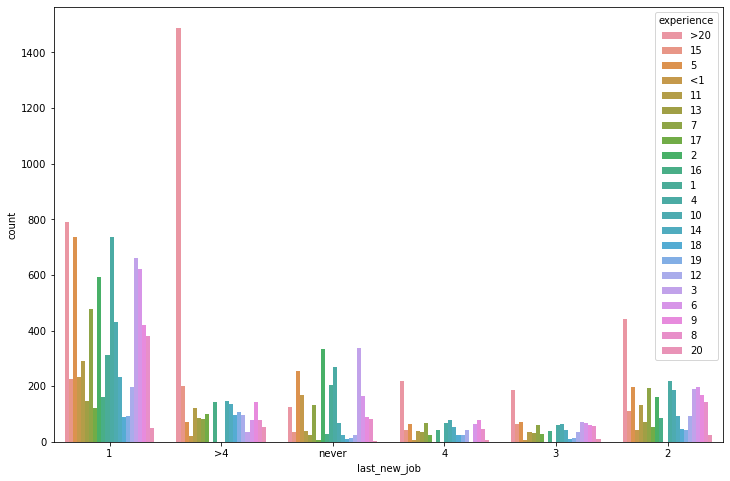

In [149]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='experience',data=df);

In [182]:
pd.crosstab(df['last_new_job'], df['experience']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

experience,1,10,11,12,13,14,15,16,17,18,...,20,3,4,5,6,7,8,9,<1,>20
last_new_job,,,,,,,,,,,,,,,,,,,,,
1,3.9,5.4,3.6,2.4,1.8,2.9,2.8,2.0,1.5,1.1,...,0.6,8.2,9.2,9.2,7.8,6.0,4.8,5.3,2.9,9.9
2,0.0,6.4,4.5,3.2,2.4,3.2,3.8,3.0,1.9,1.6,...,0.9,6.6,7.6,6.8,6.9,6.7,5.0,5.8,1.5,15.2
3,0.0,6.4,3.6,3.4,3.1,4.0,6.5,3.9,2.9,1.1,...,0.9,7.1,5.8,7.1,6.5,6.0,5.6,5.8,0.8,18.1
4,0.0,7.7,3.7,4.3,3.3,5.3,4.1,4.0,2.5,2.3,...,0.6,0.0,6.5,6.2,6.2,6.6,4.4,7.7,0.8,21.4
>4,0.0,4.5,3.7,2.9,2.7,4.1,6.2,4.3,3.0,2.9,...,1.6,1.1,0.0,2.2,2.3,2.5,2.3,4.4,0.6,45.4
never,8.3,2.8,1.6,1.0,0.9,0.9,1.5,1.1,0.2,0.5,...,0.2,13.8,11.0,10.4,6.8,5.4,3.4,3.7,6.9,5.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

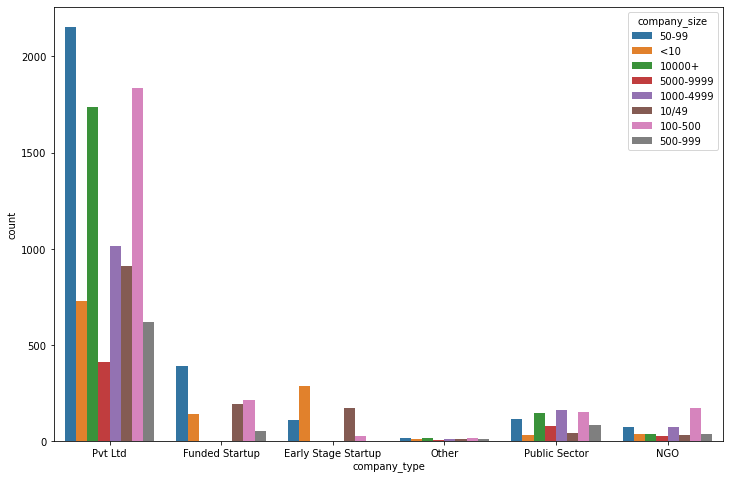

In [150]:
plt.figure(figsize=(12,8))
sns.countplot('company_type',hue='company_size',data=df);

In [183]:
pd.crosstab(df['company_type'], df['company_size']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
company_type,,,,,,,,
Early Stage Startup,29.3,4.5,0.0,0.0,18.2,0.3,0.0,47.7
Funded Startup,19.4,21.5,0.0,0.0,39.2,5.4,0.0,14.5
NGO,6.5,35.2,14.7,7.5,15.6,7.5,5.9,7.3
Other,10.6,17.7,13.3,14.2,15.9,9.7,6.2,12.4
Public Sector,5.2,18.3,20.0,18.2,14.0,10.5,9.6,4.2
Pvt Ltd,9.7,19.5,10.8,18.5,22.9,6.6,4.4,7.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

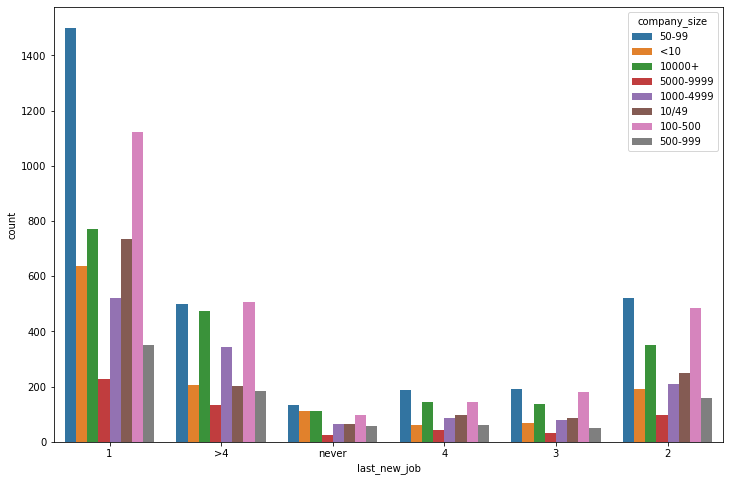

In [151]:
plt.figure(figsize=(12,8))
sns.countplot('last_new_job',hue='company_size',data=df);

In [184]:
pd.crosstab(df['last_new_job'], df['company_size']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
last_new_job,,,,,,,,
1,12.5,19.2,8.9,13.1,25.6,6.0,3.9,10.9
2,11.1,21.5,9.2,15.5,23.0,7.1,4.2,8.4
3,10.3,21.6,9.7,16.7,23.3,6.3,4.0,8.2
4,11.6,17.5,10.7,17.5,22.8,7.4,5.1,7.5
>4,7.9,19.9,13.5,18.6,19.6,7.2,5.2,8.1
never,9.9,14.5,9.9,16.9,19.9,8.5,3.7,16.9


- It is observed that the turnover rate of college graduates is high as compared to very low and vey high level of education.

### 2. Numerical-Numerical

In [189]:
corr_matrix=df.corr()
corr_matrix

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [190]:
df.corrwith(df['target'])

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

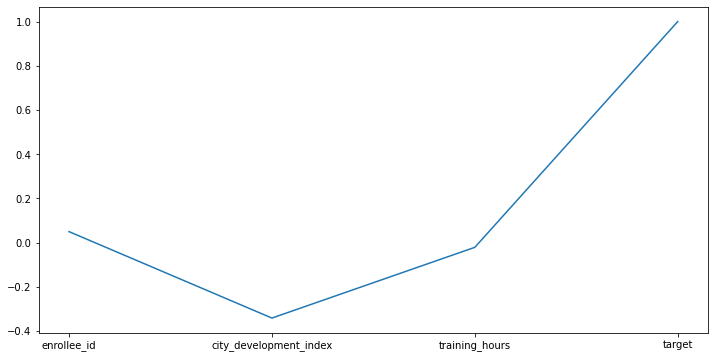

In [192]:
plt.figure(figsize=(12,6))
plt.plot(df.corr()['target']);

<IPython.core.display.Javascript object>

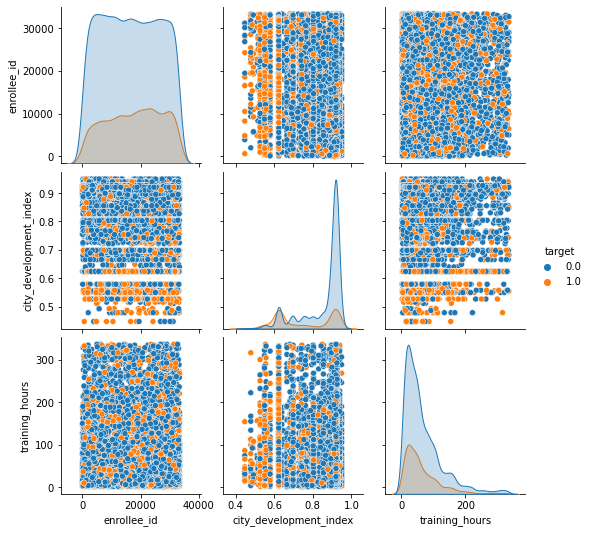

In [193]:
sns.pairplot(df,hue='target');

In [322]:
# Let's find highly correlated features

def correlation (dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [192]:
corr_features=correlation(df,0.8)
corr_features

set()

In [193]:
len(corr_features)

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

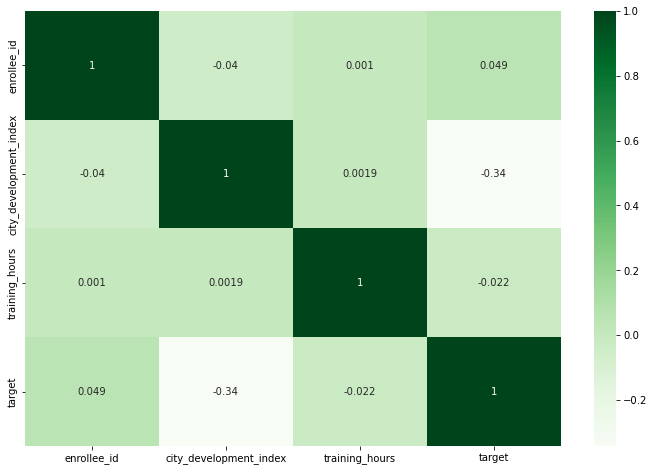

In [194]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens');

- There is nither very strong nor very weak correlation among the variables.

### 3. Numerical-Categorical

In [202]:
df_cat=df.select_dtypes(include=['category','object']).count()
df_cat

city                   19158
gender                 14650
relevent_experience    19158
enrolled_university    18772
education_level        18698
major_discipline       16345
experience             19093
company_size           13220
company_type           13018
last_new_job           18735
dtype: int64

In [199]:
df_num=df.select_dtypes(include='number').count()
df_num

enrollee_id               19158
city_development_index    19158
training_hours            19158
target                    19158
dtype: int64

# Numerical vs Target

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

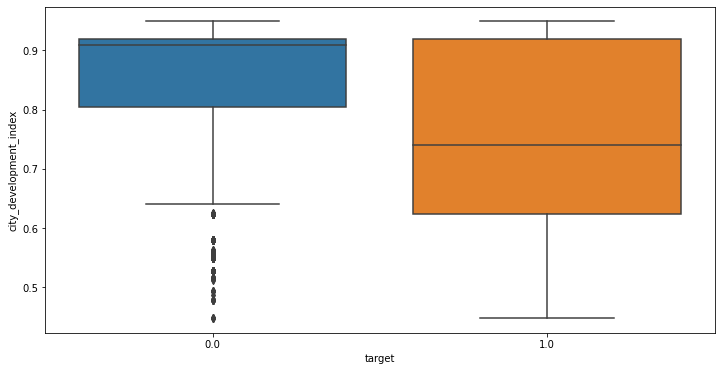

In [199]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='target',y='city_development_index');

In [203]:
categories=list(df['target'].unique())

for category in categories:
    means=round(df[df['target']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

1.0 ---> 76.0
0.0 ---> 85.0


# Insight

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

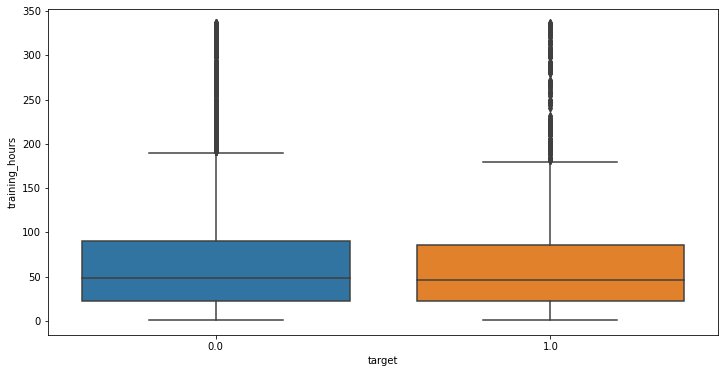

In [200]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='target',y='training_hours');

In [204]:
categories=list(df['target'].unique())

for category in categories:
    means=round(df[df['target']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

1.0 ---> 6312.0
0.0 ---> 6611.0


# Numerical vs other categories

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

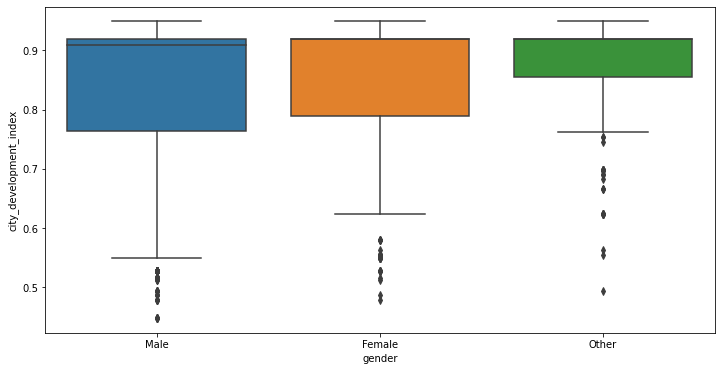

In [206]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='gender',y='city_development_index');

In [237]:
categories=list(df['gender'].unique())

for category in categories:
    means=round(df[df['gender']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

Male ---> 84.0
nan ---> nan
Female ---> 84.0
Other ---> 87.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

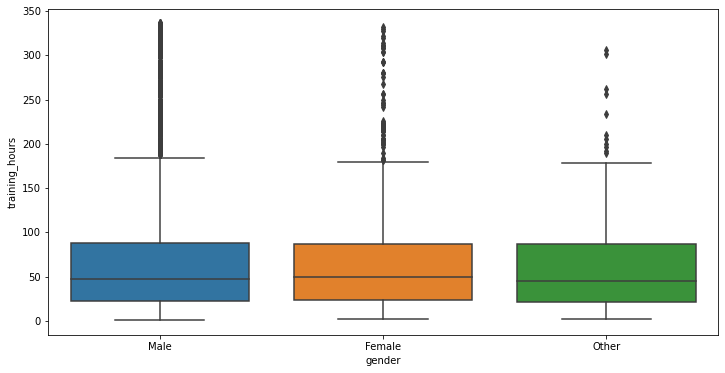

In [207]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='gender',y='training_hours');

In [238]:
categories=list(df['gender'].unique())

for category in categories:
    means=round(df[df['gender']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

Male ---> 6530.0
nan ---> nan
Female ---> 6564.0
Other ---> 6387.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

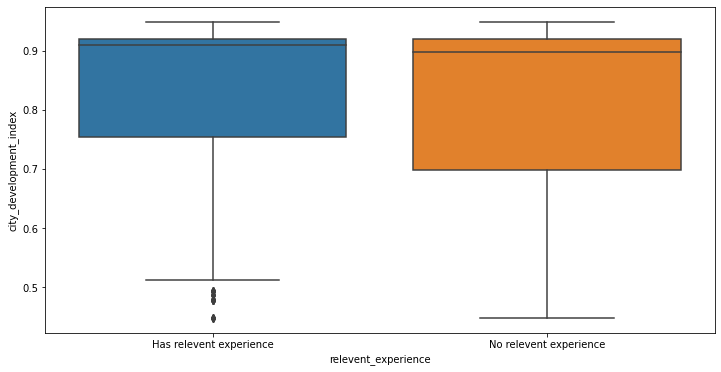

In [209]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='relevent_experience',y='city_development_index');

In [240]:
categories=list(df['relevent_experience'].unique())

for category in categories:
    means=round(df[df['relevent_experience']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

Has relevent experience ---> 83.0
No relevent experience ---> 82.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

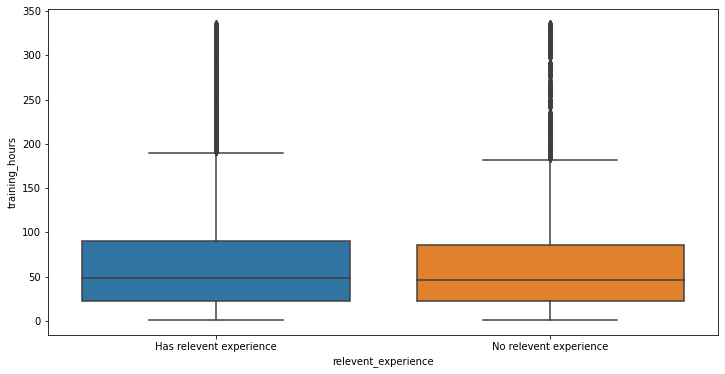

In [210]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='relevent_experience',y='training_hours');

In [241]:
categories=list(df['relevent_experience'].unique())

for category in categories:
    means=round(df[df['relevent_experience']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

Has relevent experience ---> 6580.0
No relevent experience ---> 6425.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

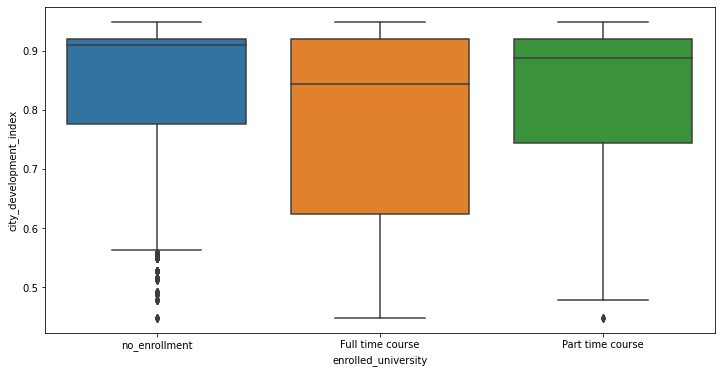

In [212]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='enrolled_university',y='city_development_index');

In [243]:
categories=list(df['enrolled_university'].unique())

for category in categories:
    means=round(df[df['enrolled_university']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

no_enrollment ---> 84.0
Full time course ---> 79.0
nan ---> nan
Part time course ---> 82.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

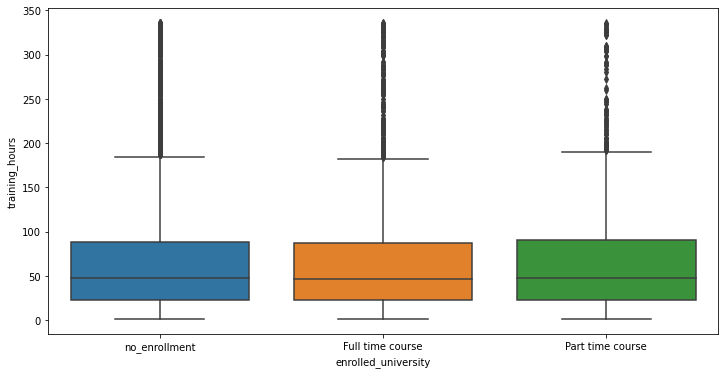

In [213]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='enrolled_university',y='training_hours');

In [244]:
categories=list(df['enrolled_university'].unique())

for category in categories:
    means=round(df[df['enrolled_university']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

no_enrollment ---> 6536.0
Full time course ---> 6453.0
nan ---> nan
Part time course ---> 6757.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

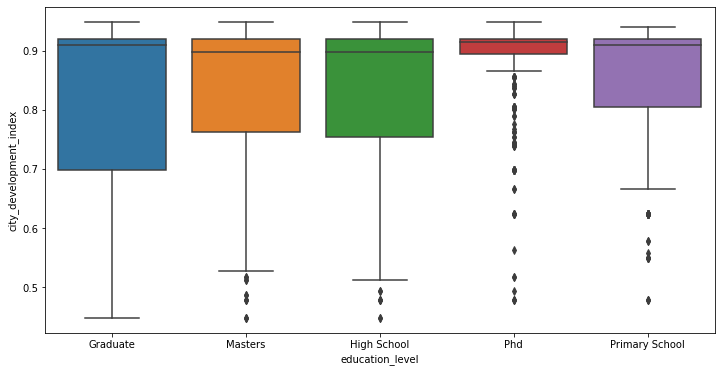

In [215]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='education_level',y='city_development_index');

In [246]:
categories=list(df['education_level'].unique())

for category in categories:
    means=round(df[df['education_level']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

Graduate ---> 82.0
Masters ---> 84.0
High School ---> 83.0
nan ---> nan
Phd ---> 88.0
Primary School ---> 85.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

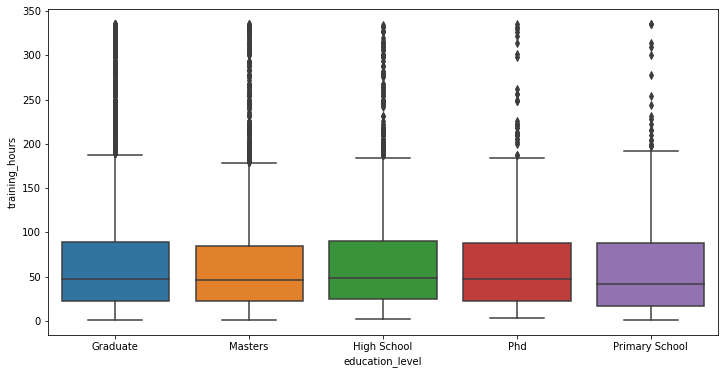

In [216]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='education_level',y='training_hours');

In [247]:
categories=list(df['education_level'].unique())

for category in categories:
    means=round(df[df['education_level']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

Graduate ---> 6577.0
Masters ---> 6327.0
High School ---> 6668.0
nan ---> nan
Phd ---> 6752.0
Primary School ---> 6363.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

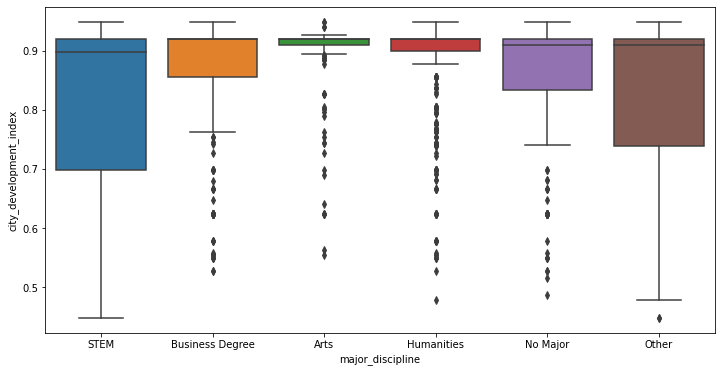

In [220]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='major_discipline',y='city_development_index');

In [249]:
categories=list(df['major_discipline'].unique())

for category in categories:
    means=round(df[df['major_discipline']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

STEM ---> 82.0
Business Degree ---> 86.0
nan ---> nan
Arts ---> 90.0
Humanities ---> 89.0
No Major ---> 85.0
Other ---> 83.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

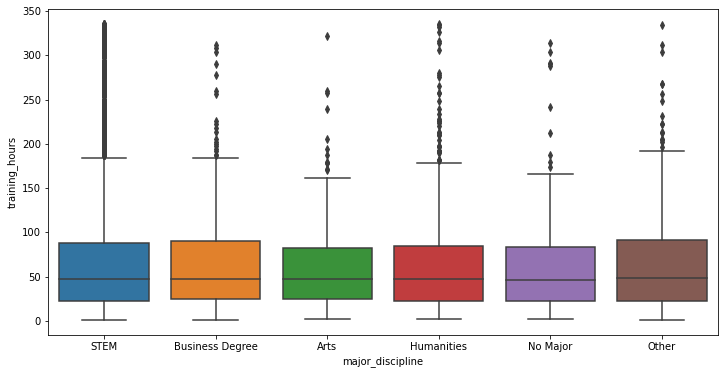

In [223]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='major_discipline',y='training_hours');

In [250]:
categories=list(df['major_discipline'].unique())

for category in categories:
    means=round(df[df['major_discipline']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

STEM ---> 6521.0
Business Degree ---> 6619.0
nan ---> nan
Arts ---> 6027.0
Humanities ---> 6564.0
No Major ---> 6294.0
Other ---> 6605.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

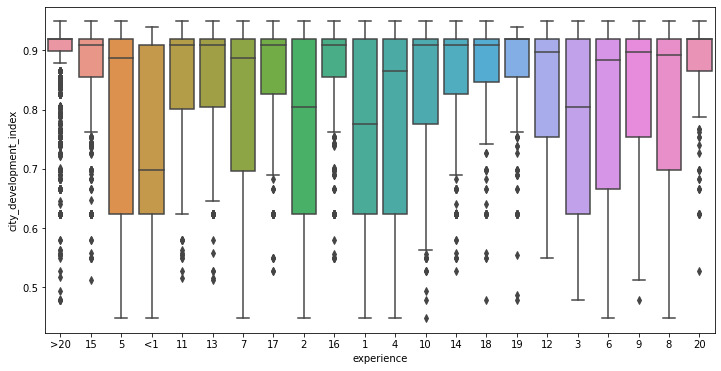

In [225]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='experience',y='city_development_index');

In [252]:
categories=list(df['experience'].unique())

for category in categories:
    means=round(df[df['experience']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

>20 ---> 89.0
15 ---> 87.0
5 ---> 80.0
<1 ---> 74.0
11 ---> 85.0
13 ---> 85.0
7 ---> 81.0
17 ---> 86.0
2 ---> 78.0
16 ---> 87.0
1 ---> 77.0
4 ---> 79.0
10 ---> 84.0
14 ---> 86.0
18 ---> 87.0
19 ---> 87.0
12 ---> 84.0
3 ---> 78.0
6 ---> 80.0
9 ---> 83.0
8 ---> 82.0
20 ---> 87.0
nan ---> nan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

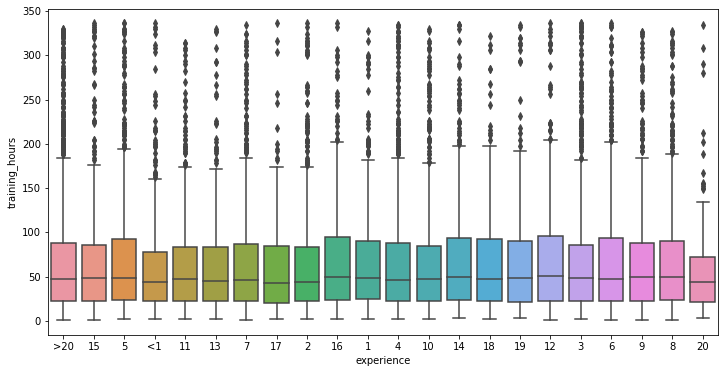

In [226]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='experience',y='training_hours');

In [253]:
categories=list(df['experience'].unique())

for category in categories:
    means=round(df[df['experience']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

>20 ---> 6467.0
15 ---> 6553.0
5 ---> 6724.0
<1 ---> 6136.0
11 ---> 6366.0
13 ---> 6348.0
7 ---> 6446.0
17 ---> 5858.0
2 ---> 6324.0
16 ---> 6888.0
1 ---> 6532.0
4 ---> 6507.0
10 ---> 6468.0
14 ---> 7000.0
18 ---> 6666.0
19 ---> 6845.0
12 ---> 7021.0
3 ---> 6568.0
6 ---> 6661.0
9 ---> 6375.0
8 ---> 6789.0
20 ---> 6049.0
nan ---> nan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

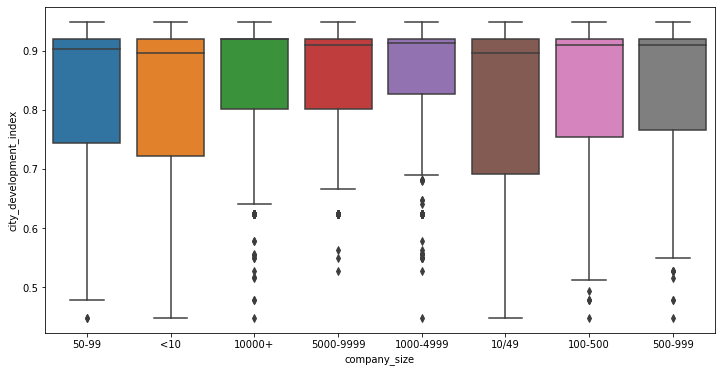

In [228]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='company_size',y='city_development_index');

In [255]:
categories=list(df['company_size'].unique())

for category in categories:
    means=round(df[df['company_size']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
50-99 ---> 83.0
<10 ---> 82.0
10000+ ---> 85.0
5000-9999 ---> 85.0
1000-4999 ---> 86.0
10/49 ---> 81.0
100-500 ---> 84.0
500-999 ---> 84.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

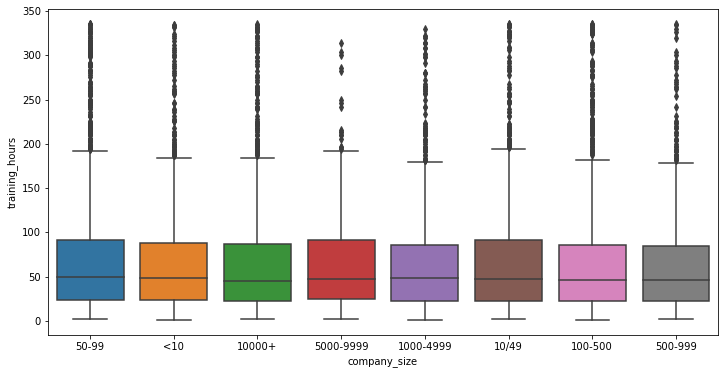

In [229]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='company_size',y='training_hours');

In [256]:
categories=list(df['company_size'].unique())

for category in categories:
    means=round(df[df['company_size']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
50-99 ---> 6816.0
<10 ---> 6580.0
10000+ ---> 6452.0
5000-9999 ---> 6454.0
1000-4999 ---> 6462.0
10/49 ---> 6693.0
100-500 ---> 6398.0
500-999 ---> 6428.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

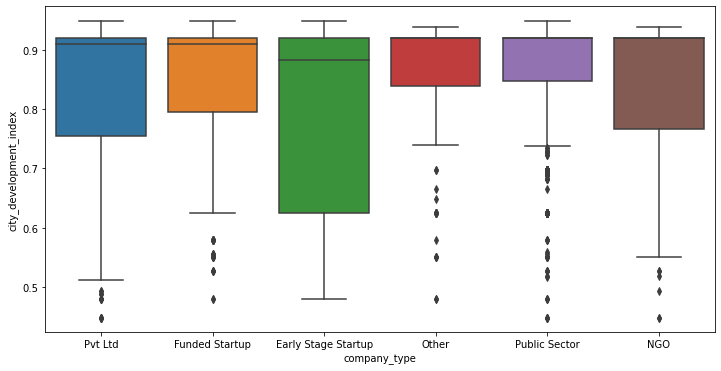

In [231]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='company_type',y='city_development_index');

In [258]:
categories=list(df['company_type'].unique())

for category in categories:
    means=round(df[df['company_type']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
Pvt Ltd ---> 83.0
Funded Startup ---> 85.0
Early Stage Startup ---> 79.0
Other ---> 85.0
Public Sector ---> 86.0
NGO ---> 85.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

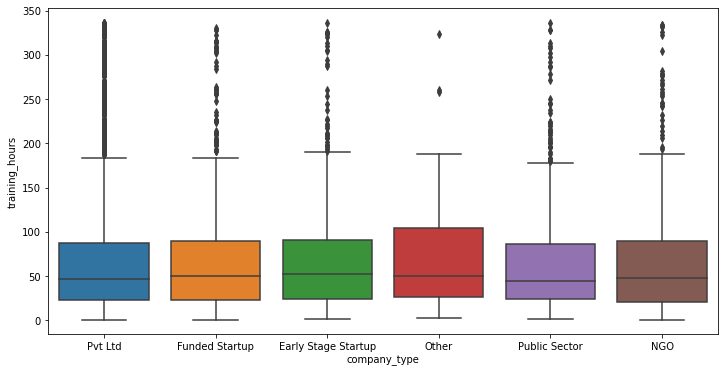

In [232]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='company_type',y='training_hours');

In [259]:
categories=list(df['company_type'].unique())

for category in categories:
    means=round(df[df['company_type']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

nan ---> nan
Pvt Ltd ---> 6528.0
Funded Startup ---> 6700.0
Early Stage Startup ---> 6949.0
Other ---> 6900.0
Public Sector ---> 6205.0
NGO ---> 6786.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

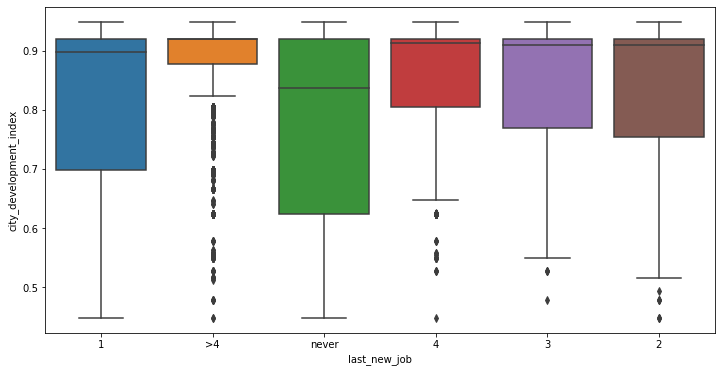

In [234]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='last_new_job',y='city_development_index');

In [261]:
categories=list(df['last_new_job'].unique())

for category in categories:
    means=round(df[df['last_new_job']==category]['city_development_index'].mean()*100,0)
    print(category,'--->',means)

1 ---> 82.0
>4 ---> 87.0
never ---> 78.0
4 ---> 85.0
3 ---> 84.0
2 ---> 84.0
nan ---> nan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

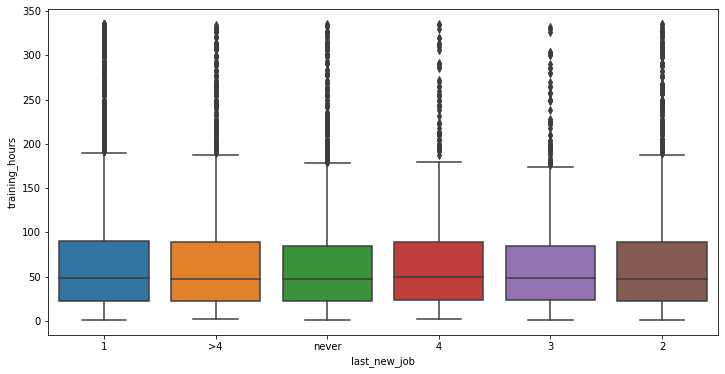

In [235]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='last_new_job',y='training_hours');

In [262]:
categories=list(df['last_new_job'].unique())

for category in categories:
    means=round(df[df['last_new_job']==category]['training_hours'].mean()*100,0)
    print(category,'--->',means)

1 ---> 6609.0
>4 ---> 6432.0
never ---> 6471.0
4 ---> 6605.0
3 ---> 6506.0
2 ---> 6580.0
nan ---> nan


# Multi-variate Analysis

# Categorical-Categorical-Categorical

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1152x576 with 0 Axes>

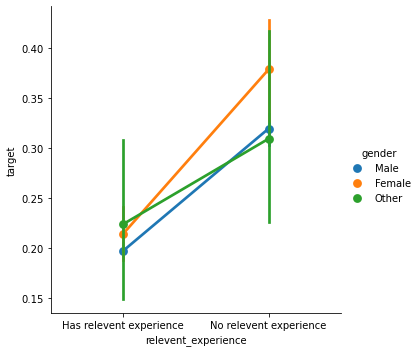

In [263]:
plt.figure(figsize=(16,8))
sns.catplot(data=df, x='relevent_experience', y='target', hue='gender', kind='point');

<IPython.core.display.Javascript object>

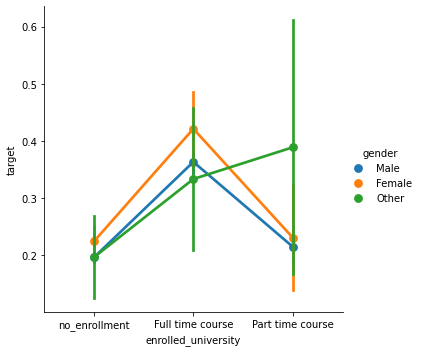

In [264]:
sns.catplot(data=df, x='enrolled_university', y='target', hue='gender', kind='point');

### 2. Numerical-Categorical-Categorical

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

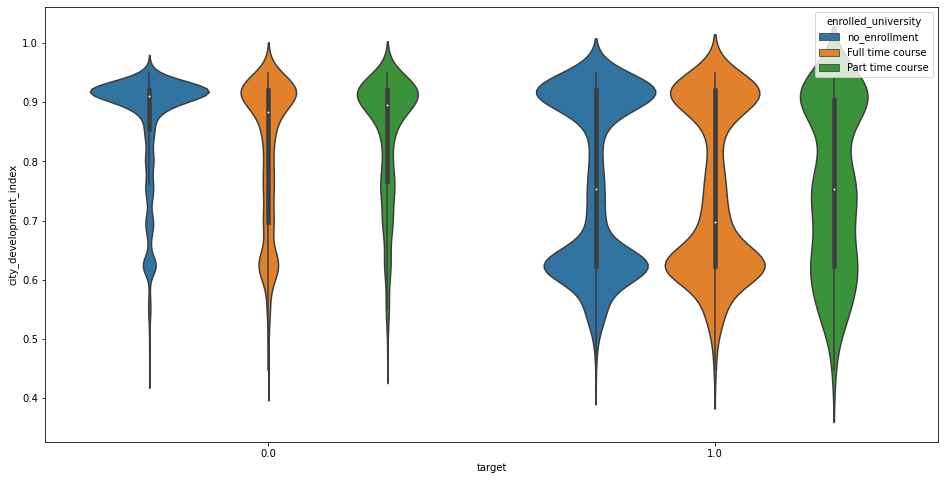

In [266]:
plt.figure(figsize=(16,8))
sns.violinplot(data=df,x='target',y='city_development_index', hue='enrolled_university');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

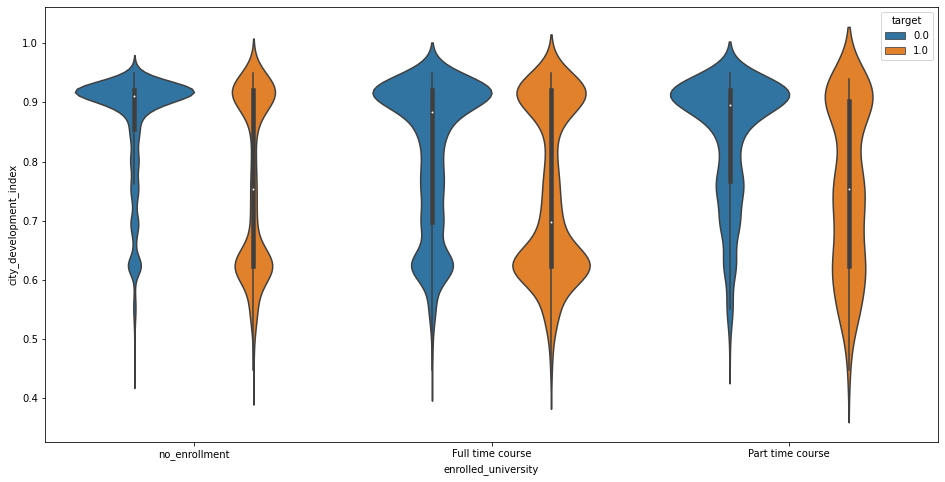

In [267]:
plt.figure(figsize=(16,8))
sns.violinplot(data=df,x='enrolled_university',y='city_development_index', hue='target');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

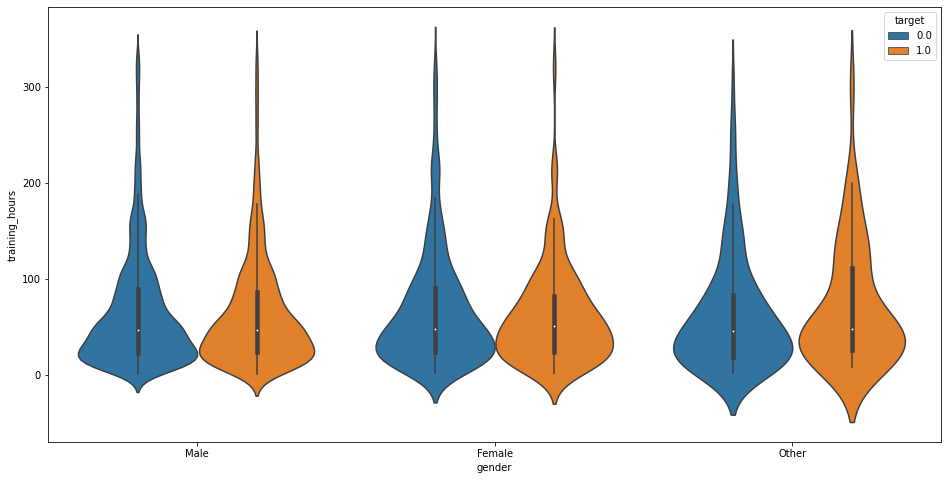

In [268]:
plt.figure(figsize=(16,8))
sns.violinplot(data=df, x='gender', y='training_hours', hue="target");

# Missing Values

In [52]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [53]:
df.isnull().sum().sum()

20733

In [54]:
(df.isnull().mean()*100).round(2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
last_new_job               2.21
training_hours             0.00
target                     0.00
dtype: float64

In [55]:
df.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [56]:
# Column wise Missing values in relative form
Percent_missing=(df.isnull().sum().sort_values(ascending=False)*100/len(df)).round(2)
Percent_missing

company_type              32.05
company_size              30.99
gender                    23.53
major_discipline          14.68
education_level            2.40
last_new_job               2.21
enrolled_university        2.01
experience                 0.34
enrollee_id                0.00
city                       0.00
city_development_index     0.00
relevent_experience        0.00
training_hours             0.00
target                     0.00
dtype: float64

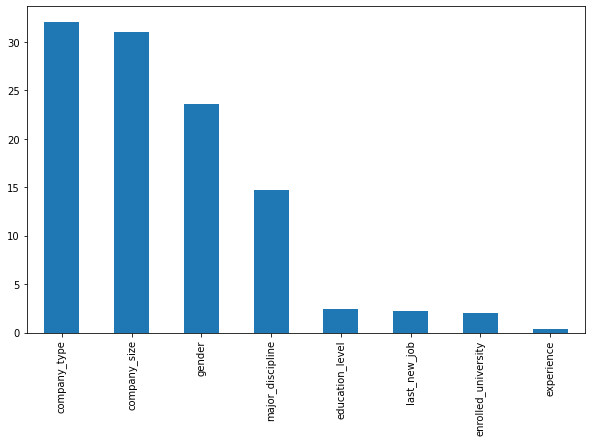

In [57]:
Percent_missing[Percent_missing!=0].plot(kind='bar',figsize=(10,6));

In [ ]:
!pip install missingno

In [58]:
import missingno as msno

<IPython.core.display.Javascript object>

<Figure size 72x72 with 0 Axes>

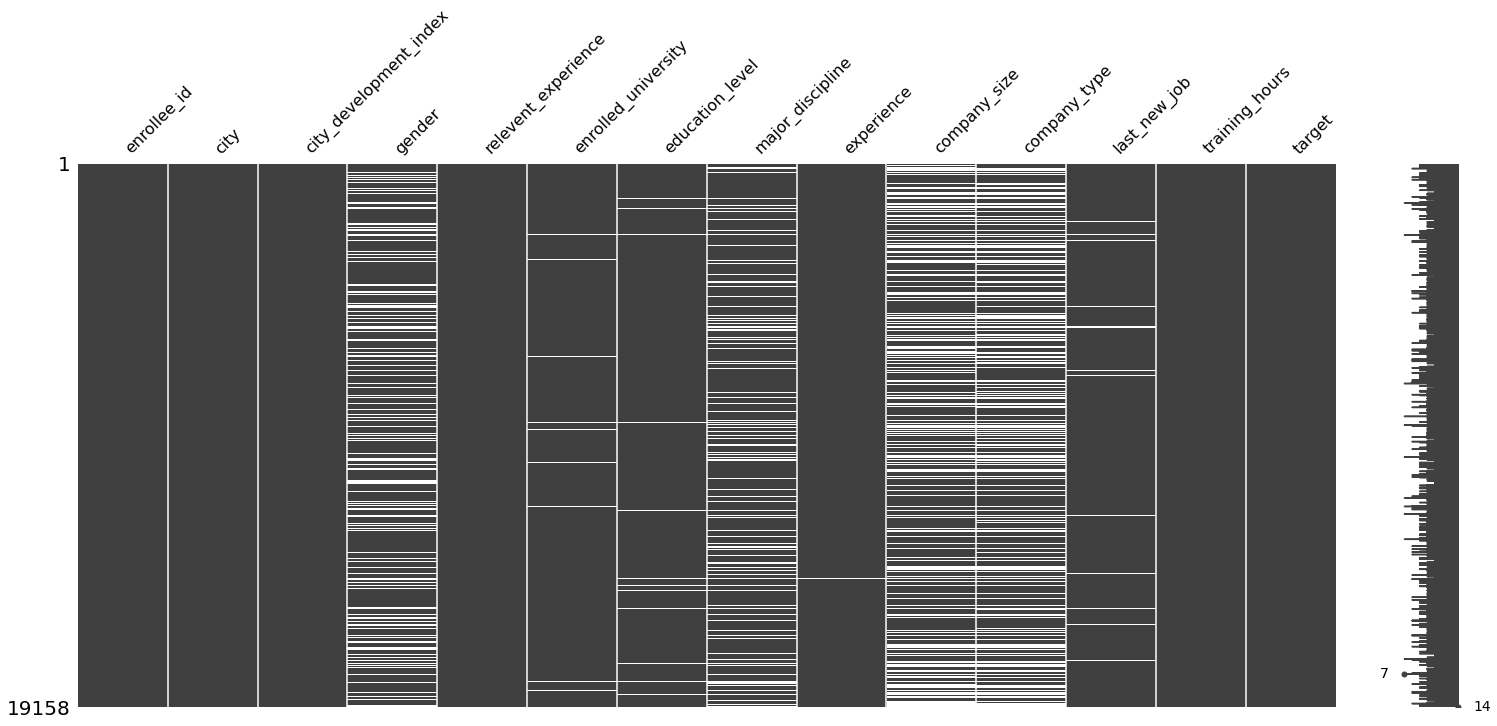

In [59]:
plt.figure(figsize=(1,1))
msno.matrix(df);

<IPython.core.display.Javascript object>

<Figure size 72x72 with 0 Axes>

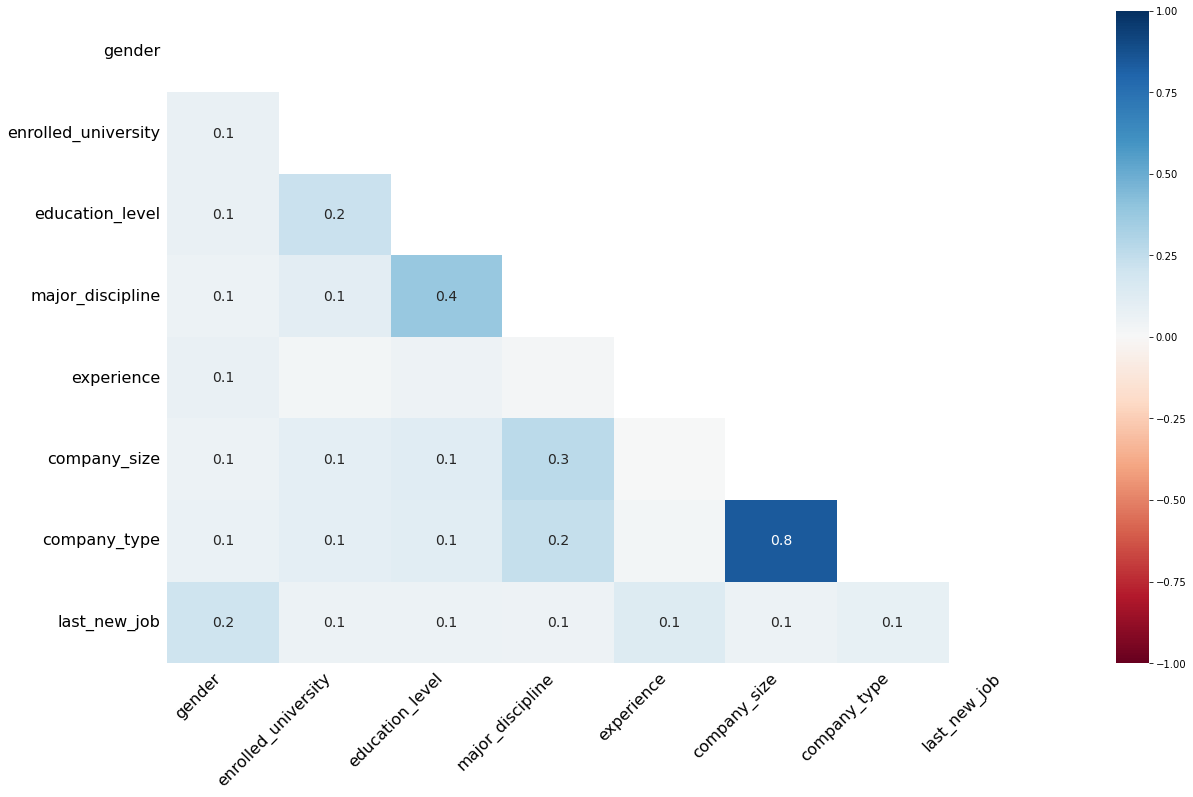

In [60]:
plt.figure(figsize=(1,1))
msno.heatmap(df);

# Duplicated Rows

In [61]:
duplicate_rows=df[df.duplicated()]
print('Number of duplicated rows: ',duplicate_rows.shape[0])

Number of duplicated rows:  0


# Outliers and Anomalies

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_limit=Q3 + 1.5 * IQR
lower_limit=Q1 - 1.5 * IQR
Outliers = df[((df <=lower_limit ) |(df >=upper_limit ))]
len(Outliers)

19158

In [63]:
for i in df_num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit=Q3 + 1.5 * IQR
    lower_limit=Q1 - 1.5 * IQR
    Outliers = df[((df[i] <=lower_limit ) |(df[i] >=upper_limit ))]
    print(f'Total number of outliers in "{i}" are:', Outliers.shape[0])

Total number of outliers in "enrollee_id" are: 0
Total number of outliers in "city_development_index" are: 17
Total number of outliers in "training_hours" are: 984
Total number of outliers in "target" are: 19158


# Outliers Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

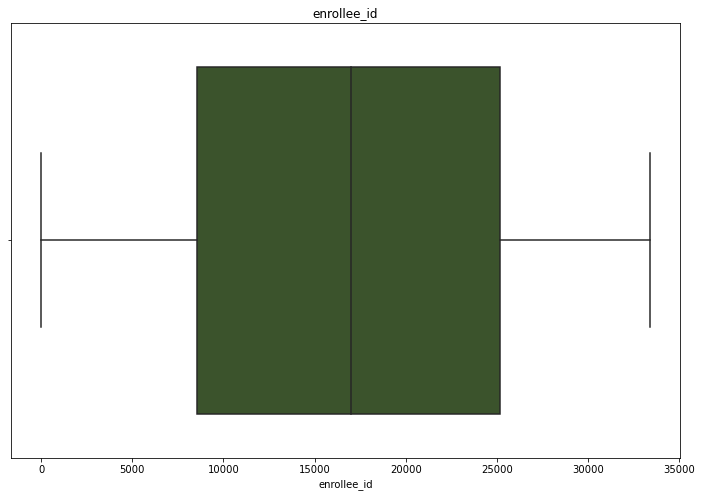

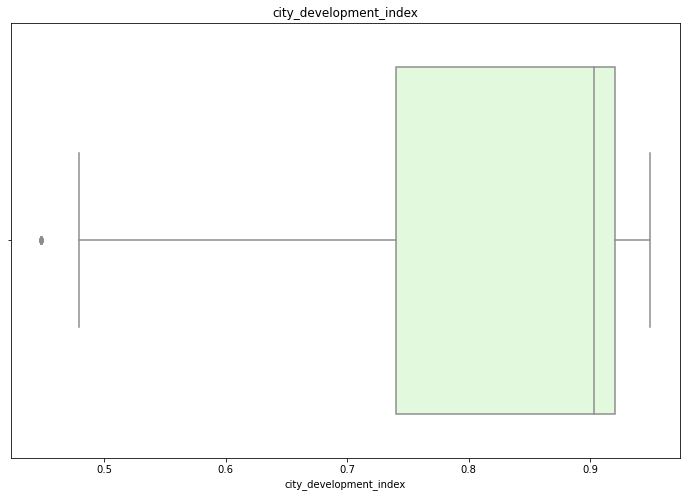

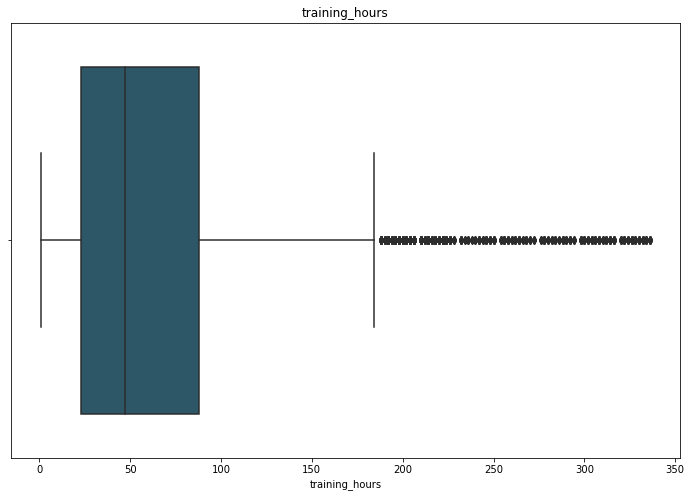

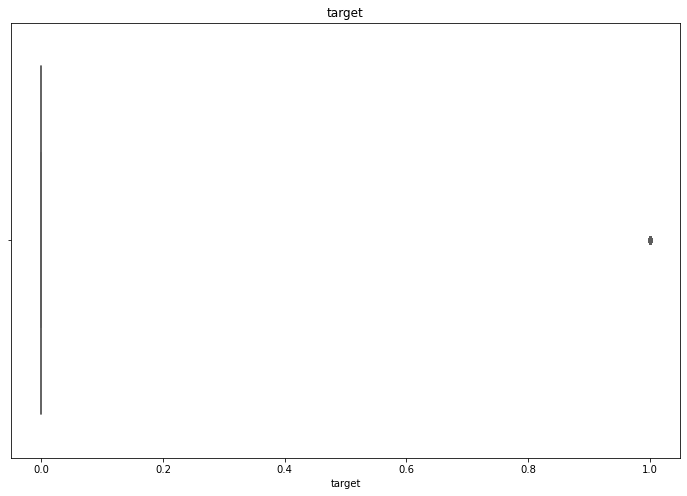

In [269]:
for i in df_num:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i], color = rand_color()).set(title = i)